## Probando kernel

***

In [1]:
5+5

10

In [3]:
import os

path = "./muestras/suculenta_dedo"
extetion = ".txt"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if extetion in file:
            files.append(r+'/'+file)

del r, d, f, file, path, extetion

files.sort()
files

['./muestras/suculenta_dedo/inside_pr_01.txt',
 './muestras/suculenta_dedo/inside_pr_02.txt',
 './muestras/suculenta_dedo/inside_pr_03.txt',
 './muestras/suculenta_dedo/inside_pr_04.txt',
 './muestras/suculenta_dedo/inside_pr_05.txt',
 './muestras/suculenta_dedo/inside_pr_06.txt',
 './muestras/suculenta_dedo/inside_pr_07.txt',
 './muestras/suculenta_dedo/inside_pr_08.txt',
 './muestras/suculenta_dedo/inside_pr_09.txt',
 './muestras/suculenta_dedo/inside_pr_10.txt',
 './muestras/suculenta_dedo/inside_pr_11.txt',
 './muestras/suculenta_dedo/inside_pr_12.txt',
 './muestras/suculenta_dedo/inside_pr_13.txt',
 './muestras/suculenta_dedo/inside_pr_14.txt',
 './muestras/suculenta_dedo/inside_pr_15.txt',
 './muestras/suculenta_dedo/inside_pr_16.txt',
 './muestras/suculenta_dedo/inside_pr_17.txt']

***

# Ploteando una observación al azar

***

15
03.07.2023 15:12:50


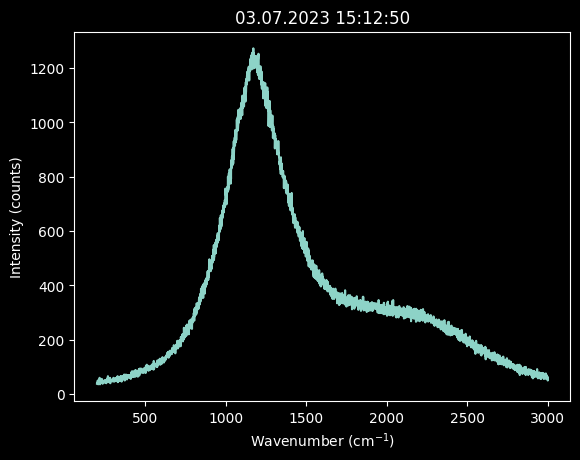

<Figure size 640x480 with 0 Axes>

In [4]:

from core import *
from random import randint

ind = randint(0,len(files)-1)
print(ind)
file = files[ind]

raman = RamanSpectrum(file)
print(raman.metadata['Acquired'])
raman.plot()

In [7]:
print('PATH             ', 'ACQUIRED', sep='\t')
print('----             ', '--------', sep='\t')

ramanspecs = {}

errlectura = []
for f in files:
    try:
        r = RamanSpectrum(f)
        ramanspecs[r.acquired.split('_')[1]] = r
        print(r.filepath, r.acquired, sep='\t')
    except:
        print(f, 'ERROR', sep='\t')
        errlectura.append(f)

del r, f

PATH             	ACQUIRED
----             	--------
./muestras/suculenta_dedo/inside_pr_01.txt	03072023_14:55:05
./muestras/suculenta_dedo/inside_pr_02.txt	03072023_14:57:05
./muestras/suculenta_dedo/inside_pr_03.txt	03072023_14:59:43
./muestras/suculenta_dedo/inside_pr_04.txt	03072023_15:00:37
./muestras/suculenta_dedo/inside_pr_05.txt	03072023_15:01:31
./muestras/suculenta_dedo/inside_pr_06.txt	03072023_15:03:12
./muestras/suculenta_dedo/inside_pr_07.txt	03072023_15:04:50
./muestras/suculenta_dedo/inside_pr_08.txt	03072023_15:05:46
./muestras/suculenta_dedo/inside_pr_09.txt	03072023_15:07:05
./muestras/suculenta_dedo/inside_pr_10.txt	ERROR
./muestras/suculenta_dedo/inside_pr_11.txt	03072023_15:08:13
./muestras/suculenta_dedo/inside_pr_12.txt	03072023_15:09:10
./muestras/suculenta_dedo/inside_pr_13.txt	03072023_15:10:08
./muestras/suculenta_dedo/inside_pr_14.txt	03072023_15:11:03
./muestras/suculenta_dedo/inside_pr_15.txt	03072023_15:11:57
./muestras/suculenta_dedo/inside_pr_16.txt	

/home/phantom/raman/core.py:50: UserWarning: loadtxt: input contained no data: "[]"
  self.data = np.loadtxt(lines[len(self.metadata):])


***

# Graficando las observaciones

***

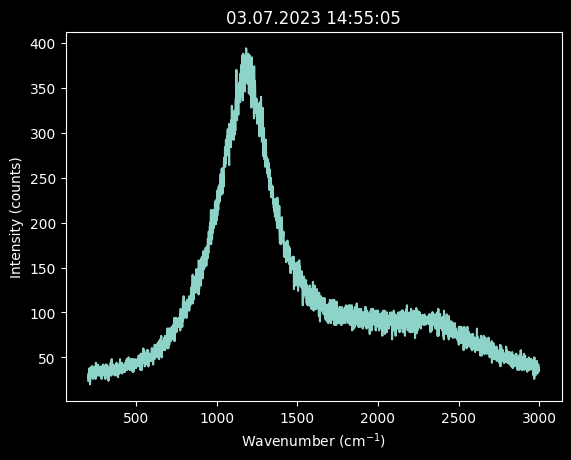

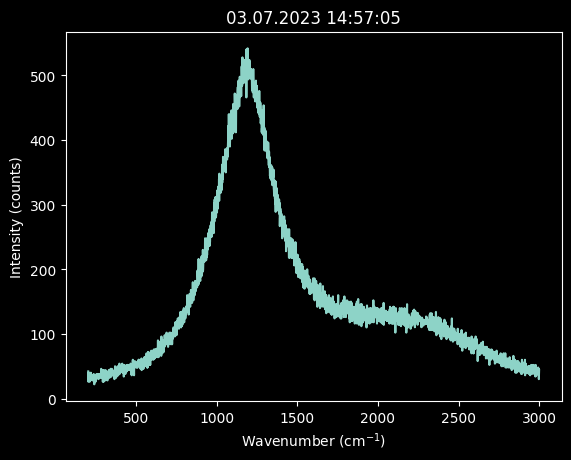

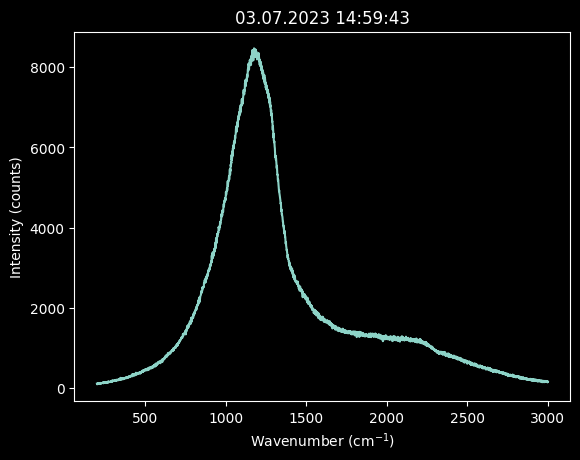

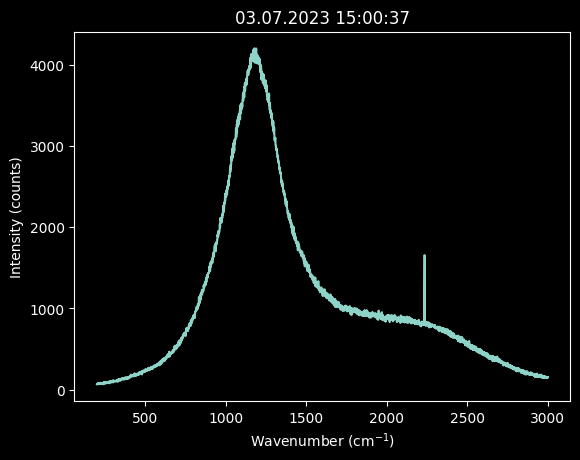

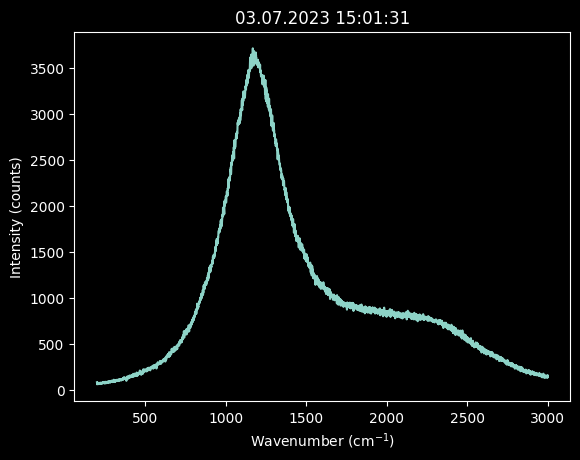

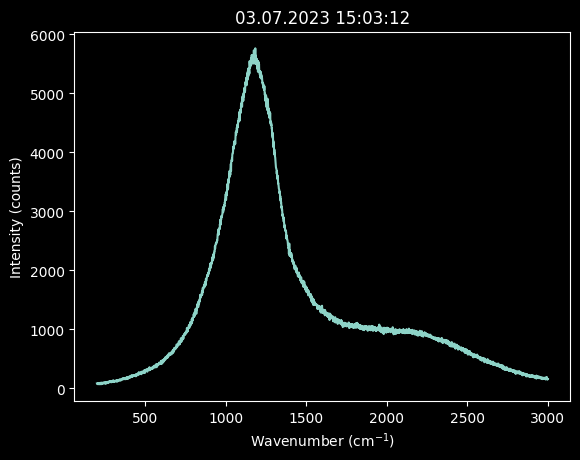

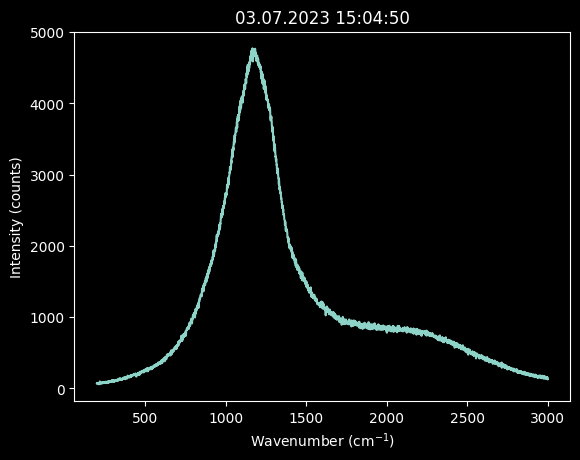

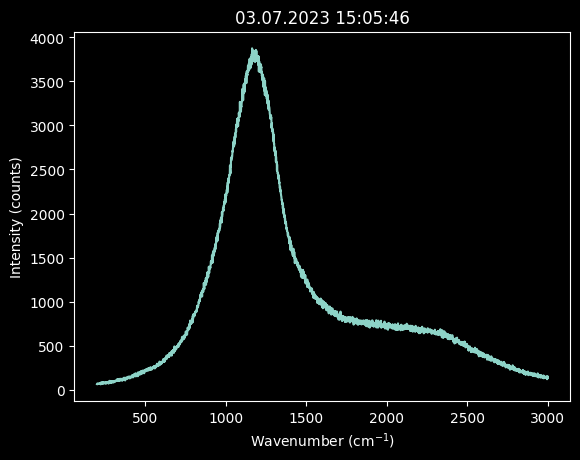

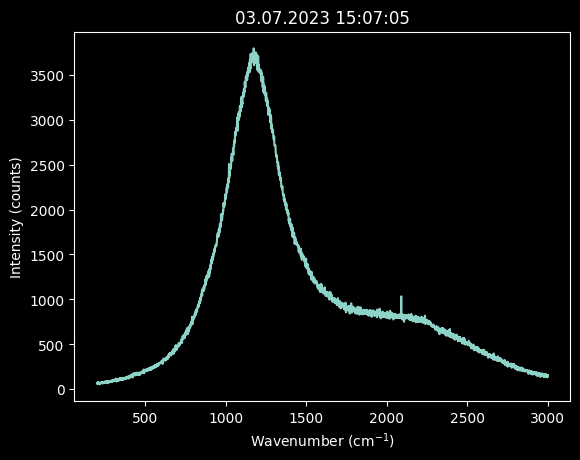

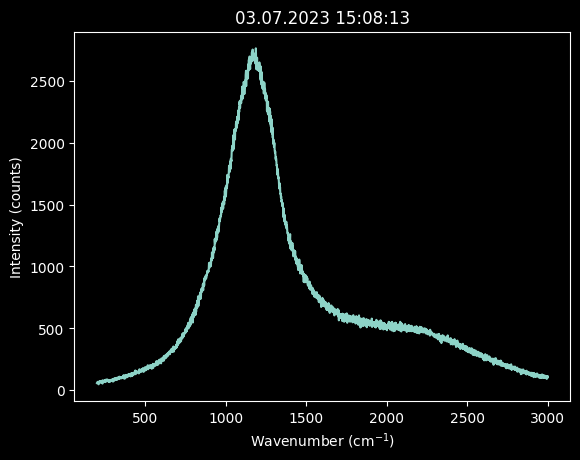

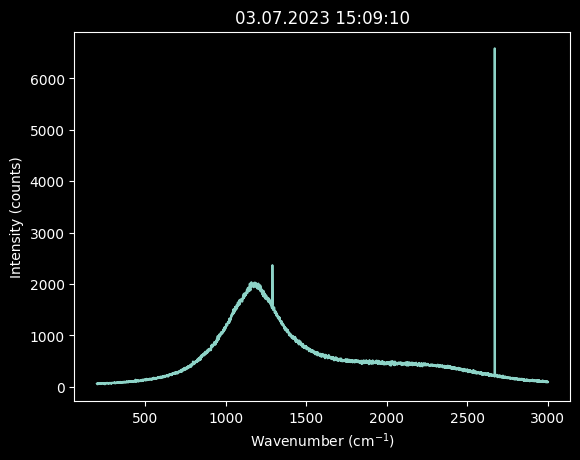

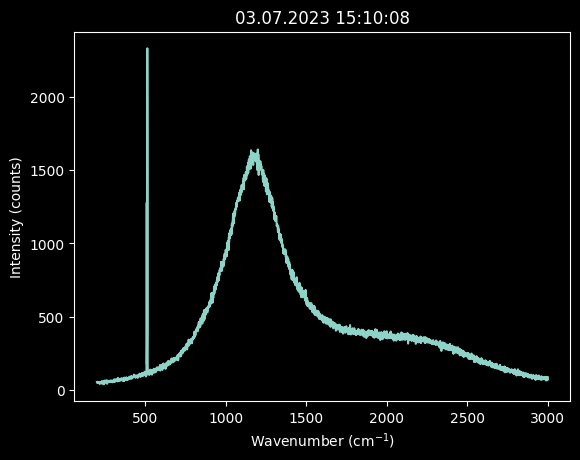

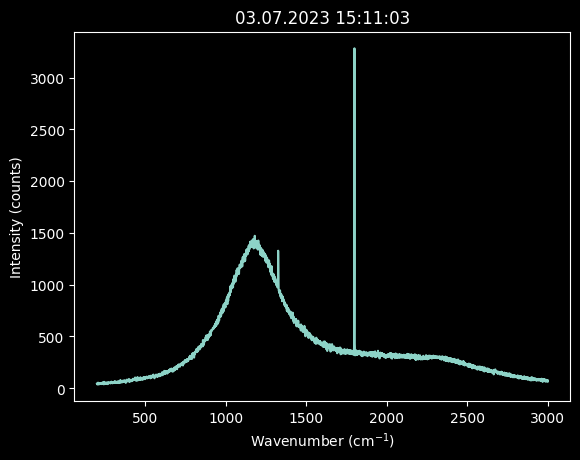

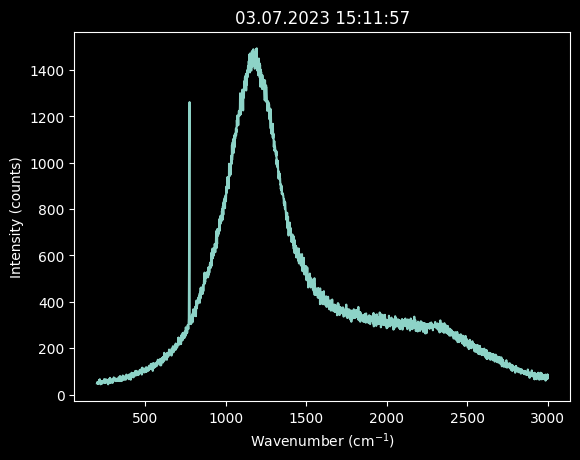

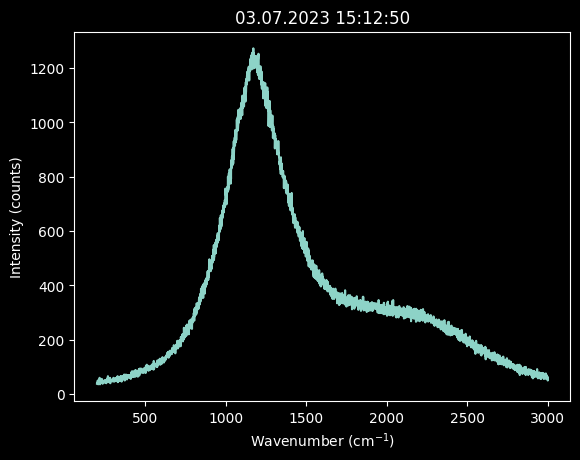

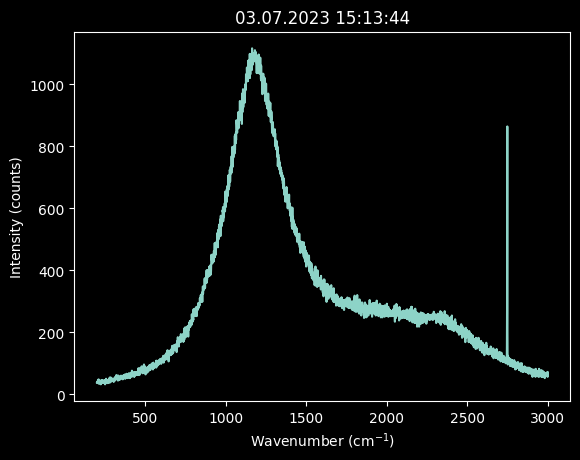

<Figure size 640x480 with 0 Axes>

In [8]:
for k, v in ramanspecs.items():
    v.plot()

***
# Limpieza de errores
***

In [7]:
removeacquired = lambda x: ramanspecs.pop(x)
ramanspecs['14:23:55'].plot()
removeacquired('14:23:55')

KeyError: '14:23:55'

In [8]:
baddata = ['14:32:58','14:11:18','14:23:55','14:21:56','14:31:12']

In [10]:
# for e in baddata:
#     try:
#         ramanspecs[e].plot()
#         removeacquired(e)
#     except KeyError:
#         print('KeyError: ', e)

***

# Cortando la grafiaca

***

In [9]:
# for k, v in ramanspecs.items():
#     v.crop(300, 1500,show=True)

In [11]:
fp = [532, 1291, 401, 313, 2197, 356, 711, 1196, 139, 81, 2756, 485]

In [10]:
ramanspecs['14:49:21'].interactive(mod=True, method ='fit_gauss')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

In [12]:
errs = []

***

# Ajustando Baseline

***

In [11]:
errs = []

Peak 1: Amplitude=128.18314376044478, Mean=1274.9793256655798, Stddev=557.1914236425404
Peak 2: Amplitude=67.50224493473969, Mean=2363.0488560842973, Stddev=320.290400480109
Peak 3: Amplitude=228.0802109016006, Mean=1173.9663666698304, Stddev=142.8448227582677
Peak 4: Amplitude=26.652938776563623, Mean=2983.191184471753, Stddev=244.22490980621973


[128, 1275, 557, 68, 2363, 320, 228, 1174, 143, 27, 2983, 244]




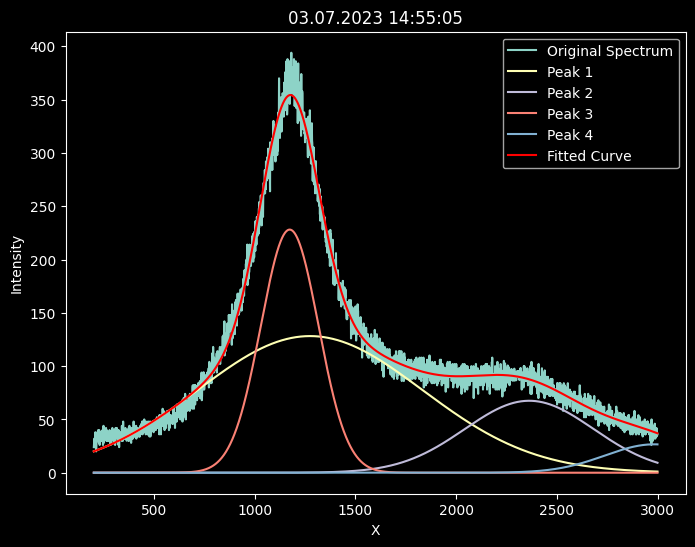

Peak 1: Amplitude=190.2351642808593, Mean=1287.8154124721436, Stddev=503.86780795906077
Peak 2: Amplitude=70.8894087603747, Mean=2242.8239879290754, Stddev=280.36958116021015
Peak 3: Amplitude=309.16584728415285, Mean=1179.0685631426861, Stddev=144.52001748047437
Peak 4: Amplitude=45.45938396111416, Mean=2751.8968879127788, Stddev=-408.3628137659285


[190, 1288, 504, 71, 2243, 280, 309, 1179, 145, 45, 2752, -408]




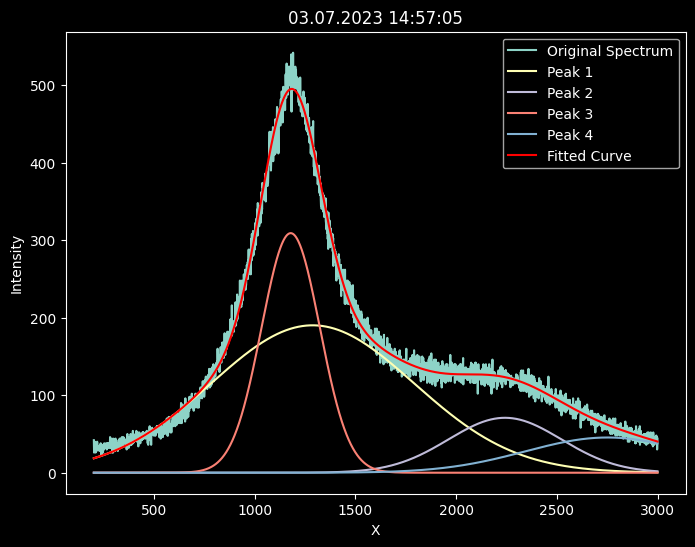

/home/phantom/miniconda3/envs/ramanconda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak 1: Amplitude=2099.203679181286, Mean=952.5131103590891, Stddev=999.8121187823036
Peak 2: Amplitude=-1648.7822478448088, Mean=392.07976974455323, Stddev=-254.39243669041636
Peak 3: Amplitude=6224.377890698973, Mean=1173.1176271399593, Stddev=-135.39914870306
Peak 4: Amplitude=380.5078396414059, Mean=-4975.396664762967, Stddev=-5.287321571315033


[2099, 953, 1000, -1649, 392, -254, 6224, 1173, -135, 381, -4975, -5]




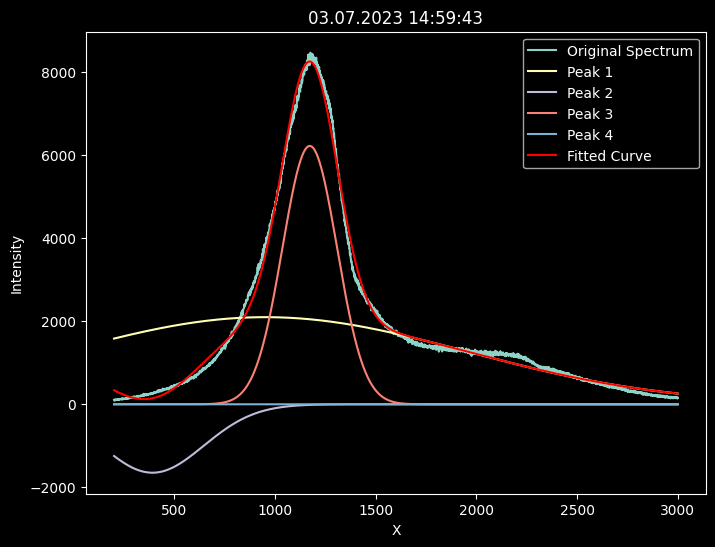

Error in  15:00:37
Peak 1: Amplitude=974.4801510588591, Mean=-5771.99327384812, Stddev=-705.1904631347102
Peak 2: Amplitude=971.7374883211737, Mean=1689.4711851297834, Stddev=716.957927662477
Peak 3: Amplitude=2682.0799644727085, Mean=1174.9314629354337, Stddev=167.6850400298243
Peak 4: Amplitude=355.3393672871465, Mean=9242.50001933775, Stddev=-736.092970527034


[974, -5772, -705, 972, 1689, 717, 2682, 1175, 168, 355, 9243, -736]




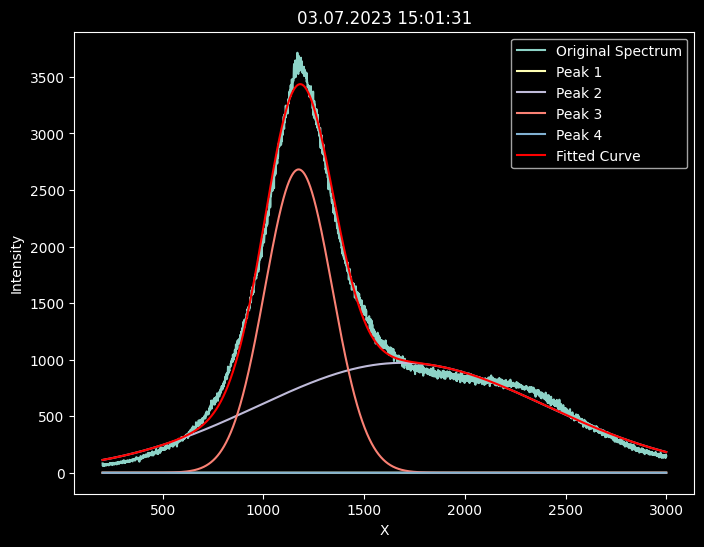

Peak 1: Amplitude=-1117.566424980418, Mean=-3671.1006630861825, Stddev=-444.9056643205731
Peak 2: Amplitude=2249.855280186732, Mean=1123.047648364707, Stddev=287.0350403691703
Peak 3: Amplitude=3062.2211844469193, Mean=1176.6935087739528, Stddev=117.7051137372524
Peak 4: Amplitude=989.3473331052132, Mean=2002.2773041208543, Stddev=-509.68506786183985


[-1118, -3671, -445, 2250, 1123, 287, 3062, 1177, 118, 989, 2002, -510]




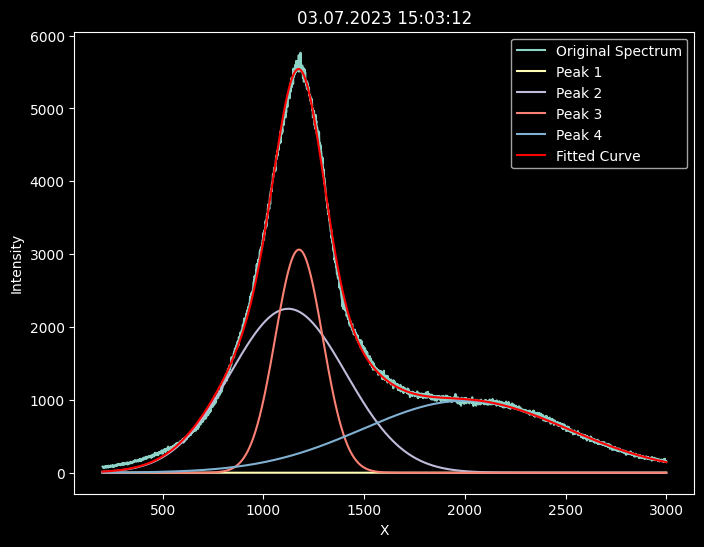

Error in  15:04:50
Peak 1: Amplitude=1035.575089385473, Mean=1254.617282629963, Stddev=418.2428501325401
Peak 2: Amplitude=1626.4353550652115, Mean=1139.9775800251184, Stddev=174.64404953607624
Peak 3: Amplitude=1169.404160715455, Mean=1193.5132714589058, Stddev=95.92684732354427
Peak 4: Amplitude=602.9903399463808, Mean=2231.5532838662834, Stddev=-408.07542514273973


[1036, 1255, 418, 1626, 1140, 175, 1169, 1194, 96, 603, 2232, -408]




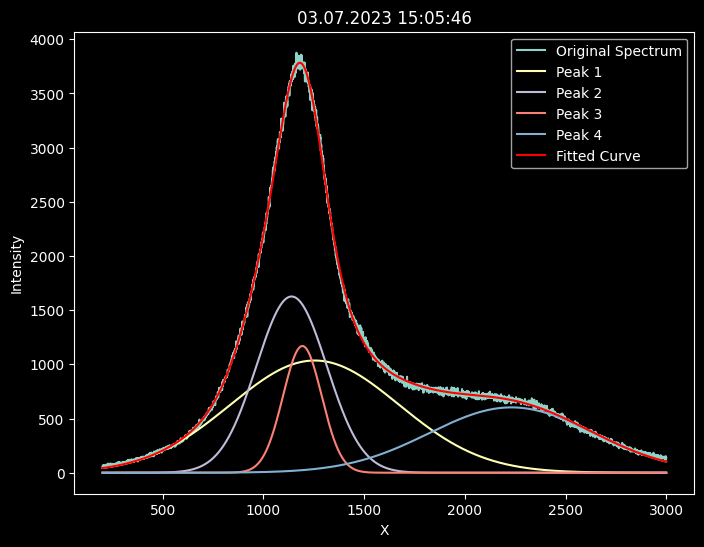

Peak 1: Amplitude=861.9547174593064, Mean=1716.8005900292485, Stddev=678.1303858324235
Peak 2: Amplitude=1778.0746033934079, Mean=1162.1699623937982, Stddev=220.40224484921993
Peak 3: Amplitude=1259.7517832880892, Mean=1174.9192175033863, Stddev=101.0417850690602
Peak 4: Amplitude=106.59095945116123, Mean=2289.930933312799, Stddev=207.58474165610966


[862, 1717, 678, 1778, 1162, 220, 1260, 1175, 101, 107, 2290, 208]




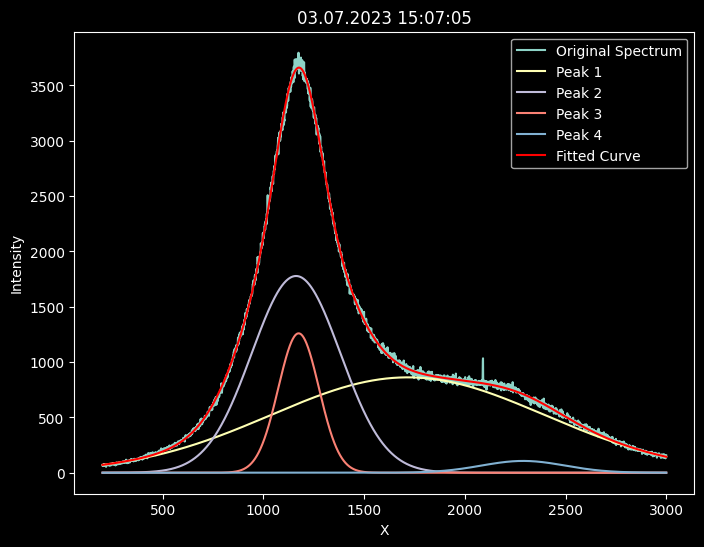

Peak 1: Amplitude=90.71435834998204, Mean=-29960.03837736454, Stddev=-5374.87923129389
Peak 2: Amplitude=615.4190246546883, Mean=1632.3400648814998, Stddev=767.4772680677314
Peak 3: Amplitude=2076.342105220794, Mean=1161.4119772143738, Stddev=161.1284814229406
Peak 4: Amplitude=-30.81799100724842, Mean=2878.7408565221886, Stddev=-145.6559277834537


[91, -29960, -5375, 615, 1632, 767, 2076, 1161, 161, -31, 2879, -146]




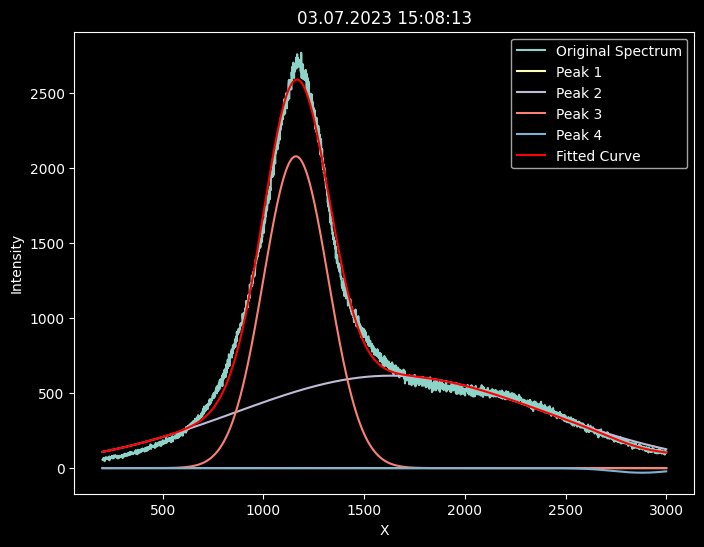

Peak 1: Amplitude=71.25481584513848, Mean=394.1608344175697, Stddev=176.31017907872564
Peak 2: Amplitude=456.48852890530276, Mean=2037.3051957915975, Stddev=549.2498613312986
Peak 3: Amplitude=853.8956072738198, Mean=1176.0543661826655, Stddev=114.52695516795201
Peak 4: Amplitude=961.5024588120527, Mean=1160.8522842317811, Stddev=277.74382260399415


[71, 394, 176, 456, 2037, 549, 854, 1176, 115, 962, 1161, 278]




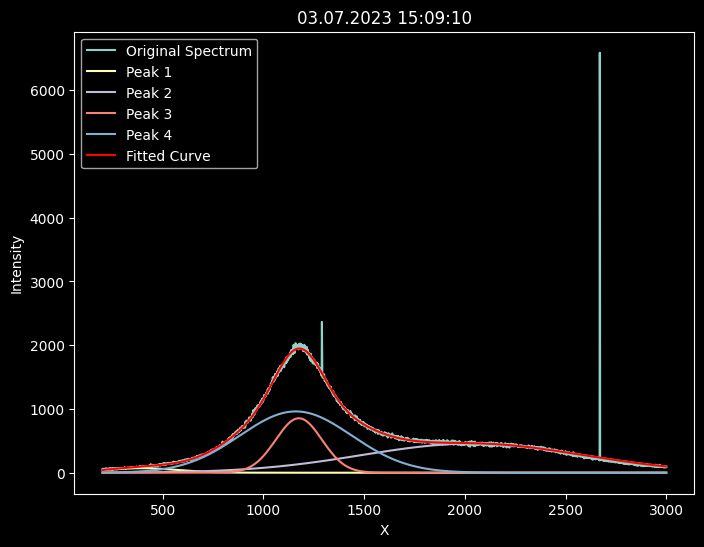

Peak 1: Amplitude=590.5381884888386, Mean=1281.2421995290483, Stddev=446.5843852384817
Peak 2: Amplitude=204.24941027413, Mean=2175.704169398252, Stddev=277.02936986443405
Peak 3: Amplitude=972.3916308763874, Mean=1170.8271873130634, Stddev=140.13412258978343
Peak 4: Amplitude=120.64092987393639, Mean=2581.97064633321, Stddev=385.16506315243515


[591, 1281, 447, 204, 2176, 277, 972, 1171, 140, 121, 2582, 385]




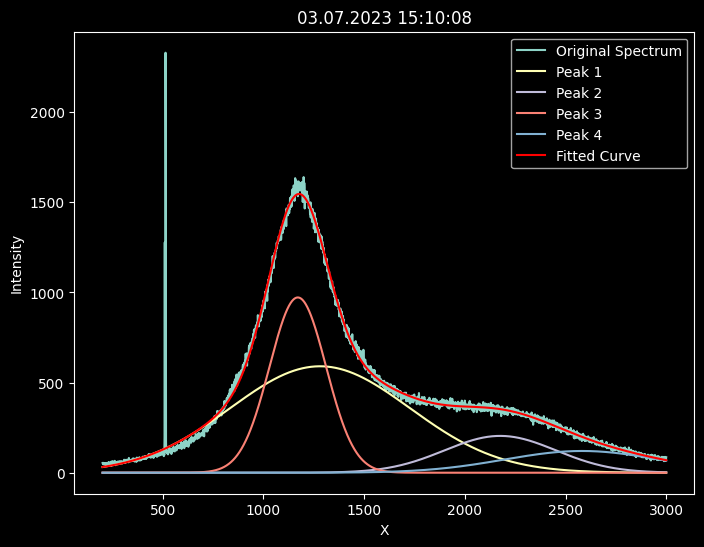

Peak 1: Amplitude=465.7541016073349, Mean=-1179.1203759339041, Stddev=142.92445414616157
Peak 2: Amplitude=368.73026305063604, Mean=1704.7954332034296, Stddev=794.7694432540633
Peak 3: Amplitude=1042.31786366621, Mean=1171.6741280219785, Stddev=167.03869618103013
Peak 4: Amplitude=-31.075159863859504, Mean=2860.159589731282, Stddev=151.1054608364166


[466, -1179, 143, 369, 1705, 795, 1042, 1172, 167, -31, 2860, 151]




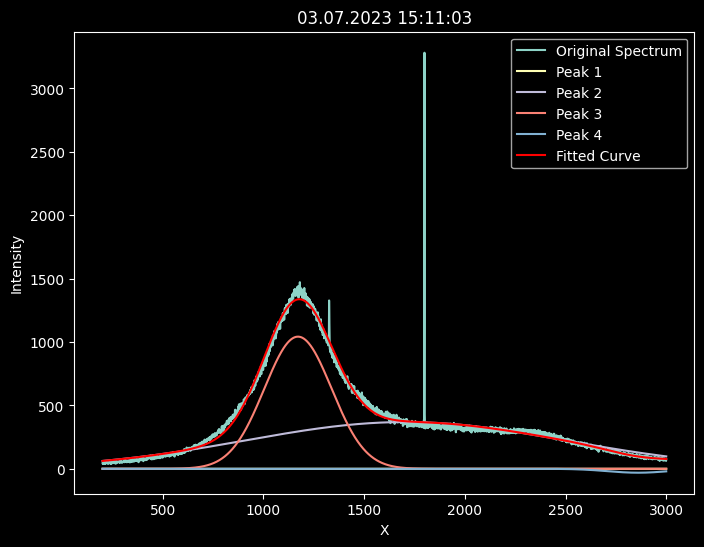

Peak 1: Amplitude=636.3526604928505, Mean=1152.5151736332768, Stddev=241.32442127687983
Peak 2: Amplitude=321.61294195941394, Mean=1893.6415825746888, Stddev=859.6630080227425
Peak 3: Amplitude=583.0575629919897, Mean=1177.967654148063, Stddev=106.89523692423379
Peak 4: Amplitude=-78.8351349911099, Mean=2852.4551214331195, Stddev=227.79057590861714


[636, 1153, 241, 322, 1894, 860, 583, 1178, 107, -79, 2852, 228]




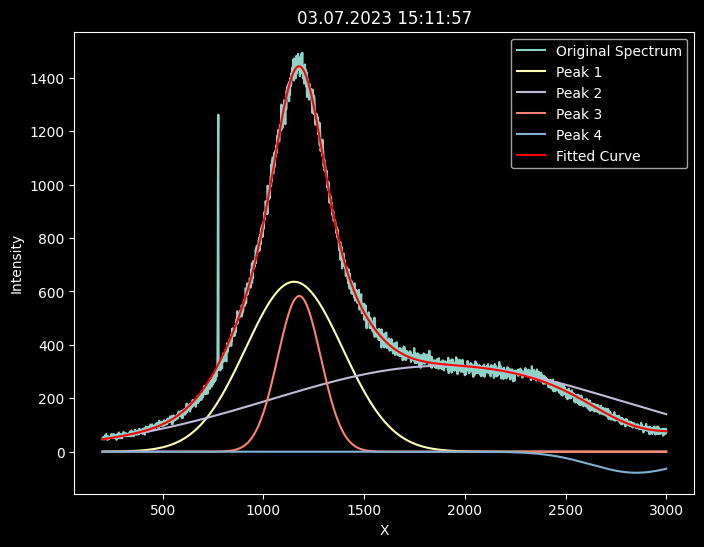

Peak 1: Amplitude=589.186639926337, Mean=-167.43072607586146, Stddev=1952.5793962660375
Peak 2: Amplitude=-523.681028364207, Mean=275.6690822530294, Stddev=480.43731299004486
Peak 3: Amplitude=804.8977957313485, Mean=1180.9060177707947, Stddev=157.5552196242203
Peak 4: Amplitude=-96.27640573287646, Mean=2886.505770576667, Stddev=259.2137451472644


[589, -167, 1953, -524, 276, 480, 805, 1181, 158, -96, 2887, 259]




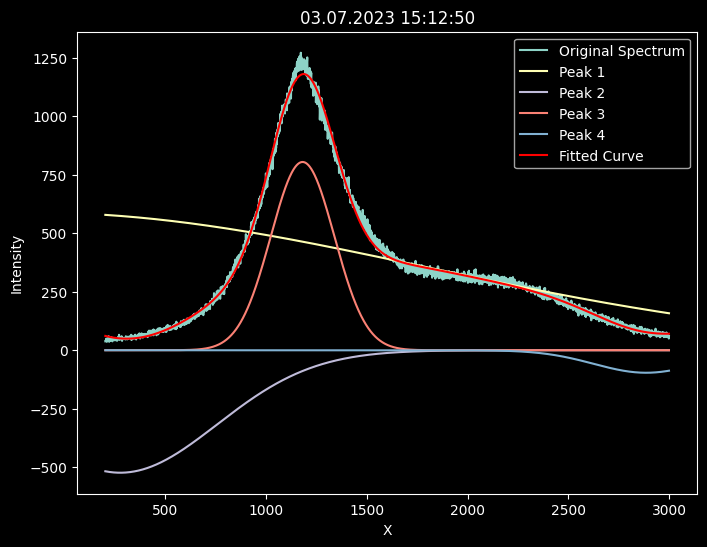

Peak 1: Amplitude=417.2499774254519, Mean=1247.1237331362927, Stddev=410.6297413817491
Peak 2: Amplitude=230.7895857723279, Mean=2279.3751539377404, Stddev=413.5835845989275
Peak 3: Amplitude=638.386872365597, Mean=1175.7303268832184, Stddev=138.7253723430459
Peak 4: Amplitude=-24.86409658634111, Mean=2584.5928912427134, Stddev=78.70917870555171


[417, 1247, 411, 231, 2279, 414, 638, 1176, 139, -25, 2585, 79]




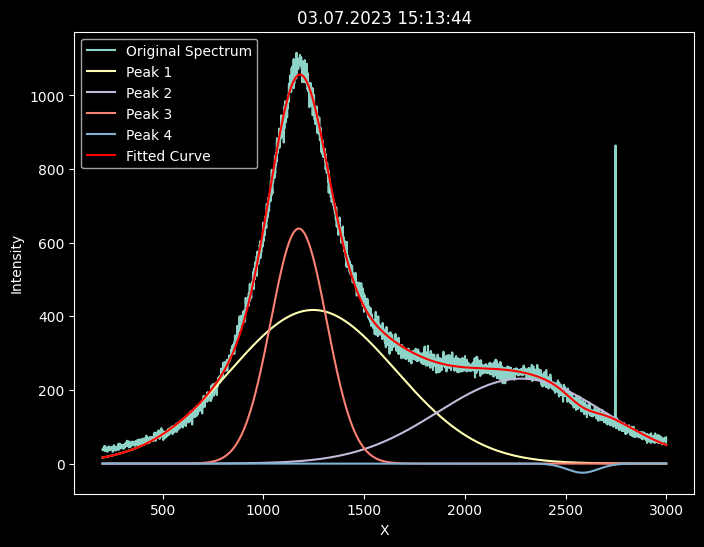

In [12]:
for k, v in ramanspecs.items():
    try:
        v.fitgaussians(pair='raw', initial_guess= [32, 1291, 401, 313, 2197, 356, 711, 1196, 139, 81, 2756, 485])
    except:
        print('Error in ', k)
        errs.append(k)

In [13]:
errs

['15:00:37', '15:04:50']

In [14]:
ramanspecs[errs[0]].interactive(mod=True, method ='fit_gauss')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

***
# Limpieza de errores (otra vez)
***

Peak 1: Amplitude=1982.5268909732279, Mean=1156.2858543651407, Stddev=222.81467185499608
Peak 2: Amplitude=968.5983453335715, Mean=1763.9289884755156, Stddev=680.3489482535646
Peak 3: Amplitude=1438.8327529003748, Mean=1184.86314349556, Stddev=103.31411326727883


[1983, 1156, 223, 969, 1764, 680, 1439, 1185, 103]




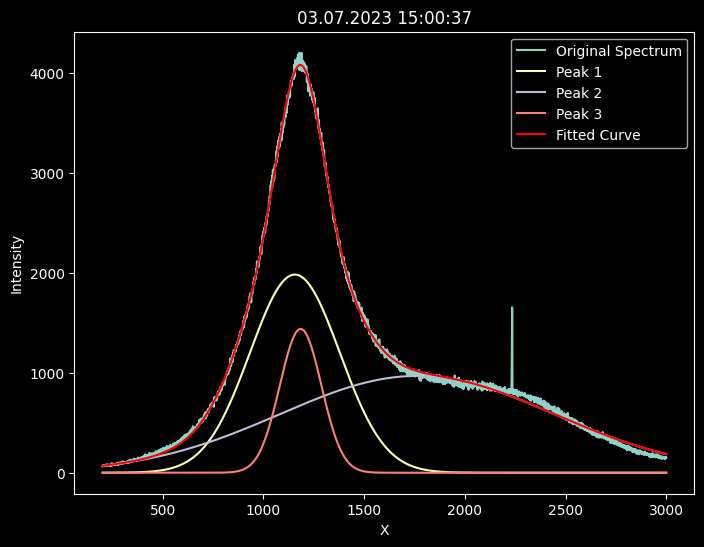

Peak 1: Amplitude=2095.0015627043376, Mean=1132.5581749510477, Stddev=220.30909635190466
Peak 2: Amplitude=929.4323240230609, Mean=1746.1317673032574, Stddev=692.1406501895029
Peak 3: Amplitude=1957.0683020076474, Mean=1185.1902185286485, Stddev=104.82186072806874


[2095, 1133, 220, 929, 1746, 692, 1957, 1185, 105]




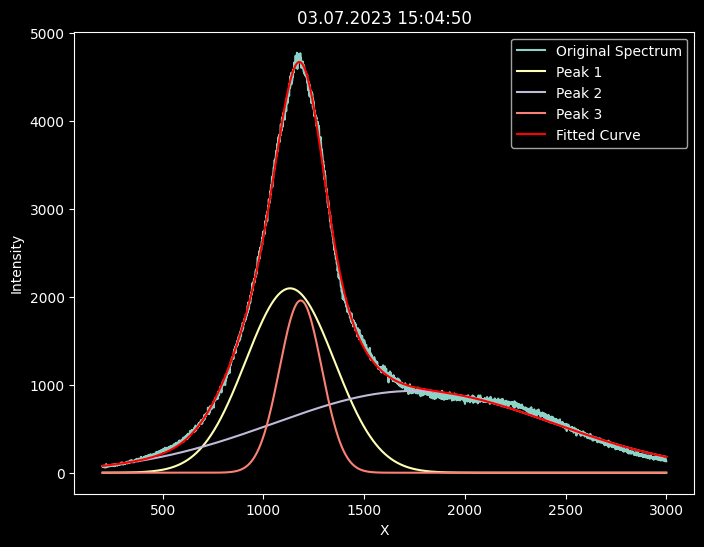

In [15]:
for e in errs:
    ramanspecs[e].fitgaussians(pair='raw', initial_guess= [1983, 1156, 223, 969, 1764, 680, 1439, 1185, 103])

In [16]:
errs.append('14:12:29')
errs.append('14:47:03')

In [17]:
errs

['14:13:55',
 '14:16:20',
 '14:27:17',
 '14:29:25',
 '14:37:09',
 '14:46:10',
 '14:12:29',
 '14:47:03']

Error in  14:13:55
Error in  14:16:20


/home/phantom/miniconda3/envs/ramanconda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak 1: Amplitude=24901.92114778984, Mean=1137.2307967925365, Stddev=207.70603711497162
Peak 2: Amplitude=21293.460874626784, Mean=1204.6013451764861, Stddev=99.42840257265559
Peak 3: Amplitude=11119.387988972303, Mean=1750.4702593612842, Stddev=642.3199396511038
Peak 4: Amplitude=1604.1934091256098, Mean=12436.113820190247, Stddev=323.87365247470916


[24902, 1137, 208, 21293, 1205, 99, 11119, 1750, 642, 1604, 12436, 324]




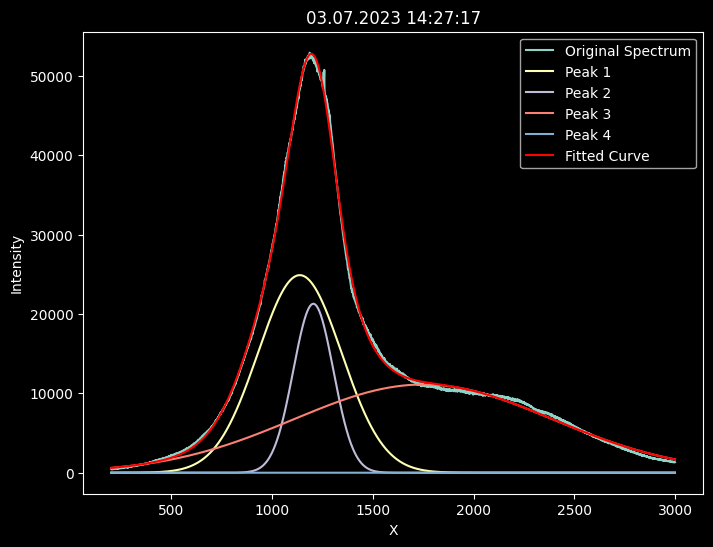

Error in  14:29:25
Peak 1: Amplitude=346.54759923942, Mean=1116.271315152587, Stddev=180.32200431889493
Peak 2: Amplitude=-17.256911060679645, Mean=1806.7646765467457, Stddev=-114.47346496006689
Peak 3: Amplitude=313.62947838800085, Mean=1194.351387892815, Stddev=99.63188865803626
Peak 4: Amplitude=173.07112068494826, Mean=1619.6898519584195, Stddev=748.820098515004


[347, 1116, 180, -17, 1807, -114, 314, 1194, 100, 173, 1620, 749]




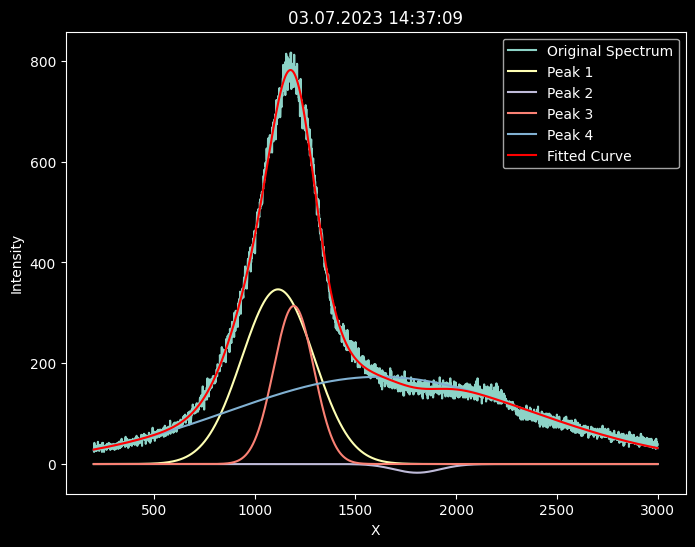

Peak 1: Amplitude=109.4282802083162, Mean=943.4149034254524, Stddev=141.89444470242108
Peak 2: Amplitude=-235.82137715957913, Mean=1331.0324556274359, Stddev=100.41855056657604
Peak 3: Amplitude=717.824665080925, Mean=1224.6746704202112, Stddev=149.82457140297072
Peak 4: Amplitude=185.6034711312008, Mean=1701.122739043527, Stddev=762.666545470917


[109, 943, 142, -236, 1331, 100, 718, 1225, 150, 186, 1701, 763]




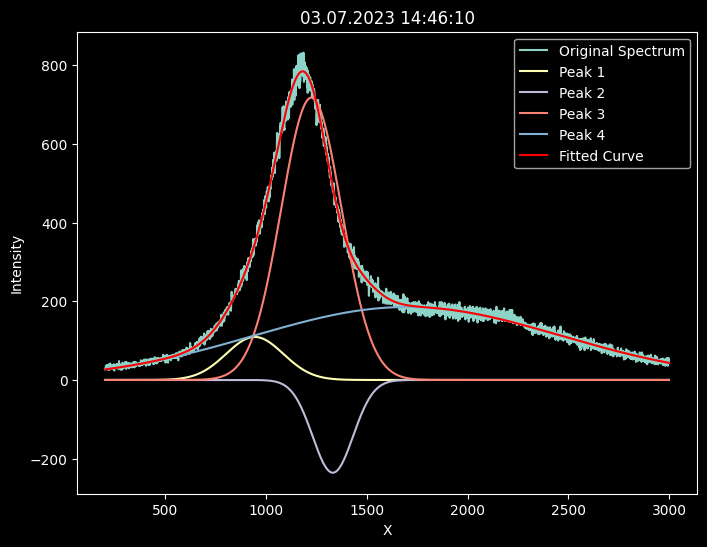

Peak 1: Amplitude=3239.698497372423, Mean=1551.347818096513, Stddev=659.4640031518262
Peak 2: Amplitude=-221.26598361191378, Mean=1765.2192768596133, Stddev=-97.85386001648054
Peak 3: Amplitude=3938.450078514037, Mean=1180.1231108623958, Stddev=156.55484716264036
Peak 4: Amplitude=-48.983531524082586, Mean=-58835.42287109197, Stddev=168158.71592002833


[3240, 1551, 659, -221, 1765, -98, 3938, 1180, 157, -49, -58835, 168159]




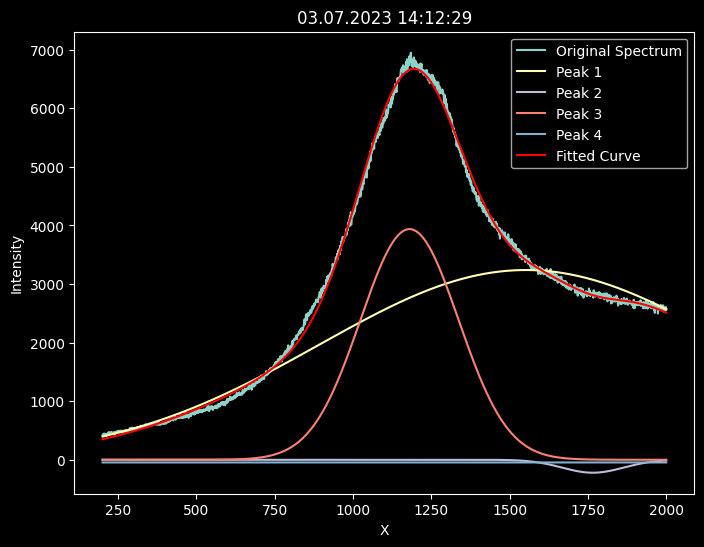

Peak 1: Amplitude=166.49338099055643, Mean=1146.9720189740058, Stddev=185.78810189633492
Peak 2: Amplitude=-9.117725362097465, Mean=1858.7091261298442, Stddev=189.84672231298637
Peak 3: Amplitude=102.869688337863, Mean=1186.951920618651, Stddev=94.79765662105656
Peak 4: Amplitude=107.0262169540344, Mean=1701.6275020277305, Stddev=874.5106080958178


[166, 1147, 186, -9, 1859, 190, 103, 1187, 95, 107, 1702, 875]




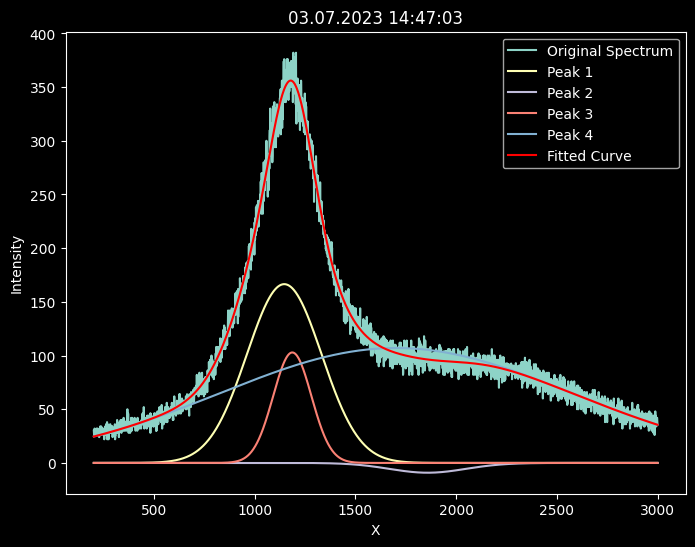

In [22]:
for e in errs:
    try:
        ramanspecs[e].fitgaussians(pair='raw', initial_guess= [146, 1136, 180, 300, 1843, 98, 104, 1204, 97, 86, 1635, 924])
    except:
        print('Error in ', e)

Peak 1: Amplitude=4923.342843250023, Mean=1185.9362598846033, Stddev=171.2926656301036
Peak 2: Amplitude=3523.225623653904, Mean=1693.9531258030772, Stddev=739.7873786907112


[4923, 1186, 171, 3523, 1694, 740]




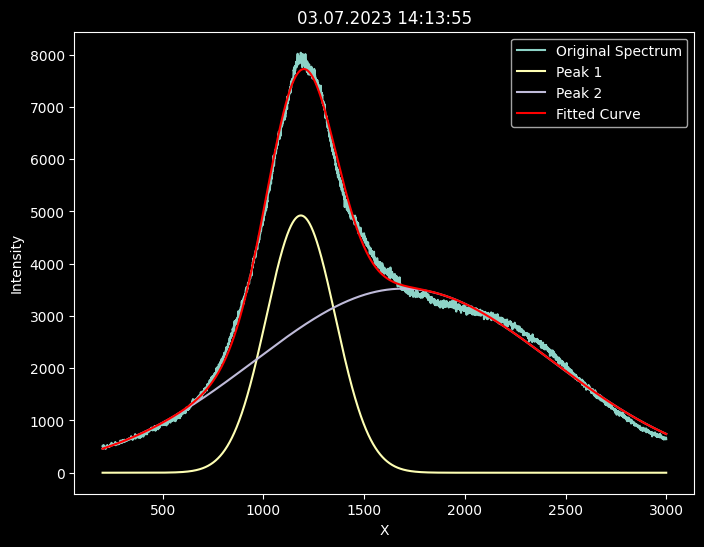

Peak 1: Amplitude=38703.52603203927, Mean=1186.6784836968334, Stddev=190.12760771372513
Peak 2: Amplitude=25676.419321297028, Mean=1749.6931633064785, Stddev=731.3816480336869


[38704, 1187, 190, 25676, 1750, 731]




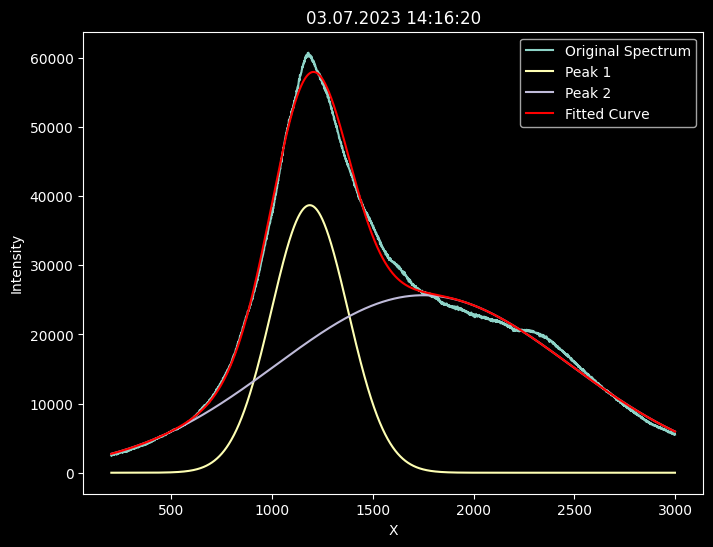

Peak 1: Amplitude=16650.052965786414, Mean=1174.7916863590142, Stddev=164.1273900225444
Peak 2: Amplitude=5514.420842189704, Mean=1683.1996096889636, Stddev=699.3150192642845


[16650, 1175, 164, 5514, 1683, 699]




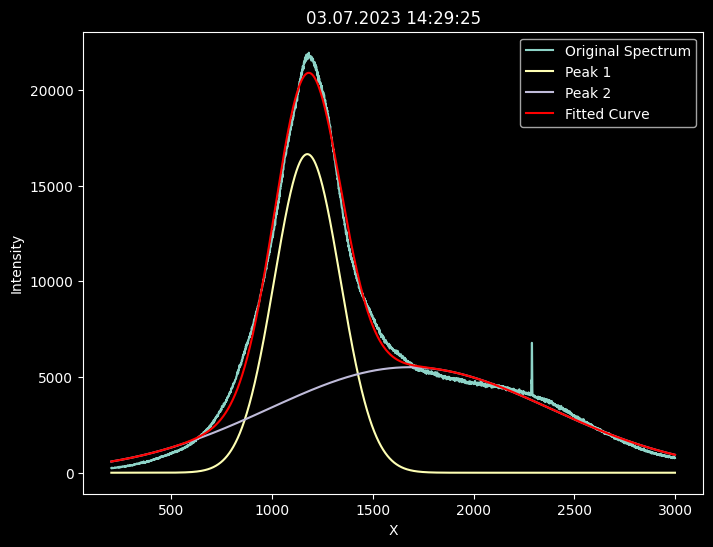

In [29]:
for e in errs:
    try:
        ramanspecs[e].fitgaussians(pair='raw', initial_guess= [4923, 1186, 171, 3523, 1694, 740])
    except:
        print('Error in ', e)

***

# Confirmando el ajuste

***

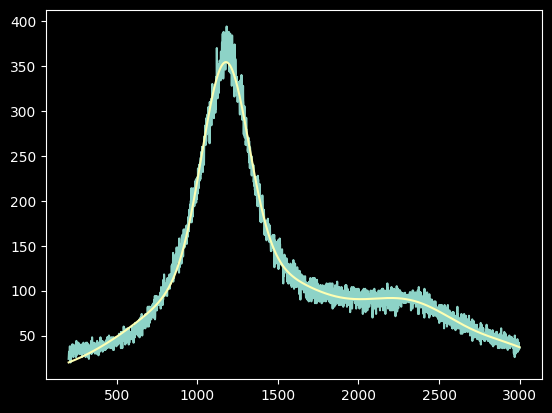

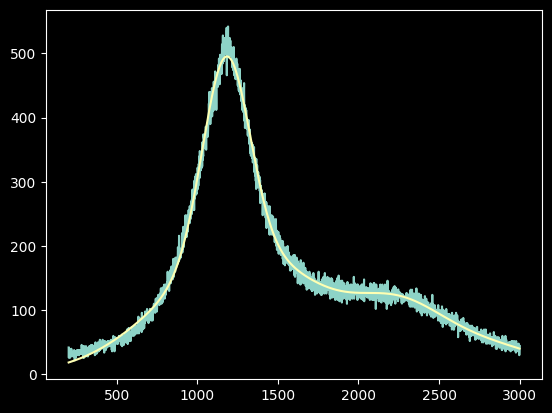

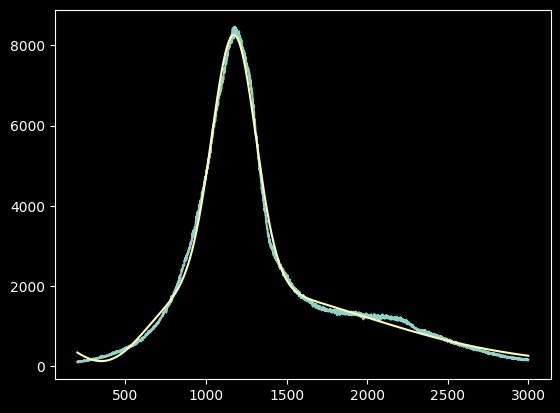

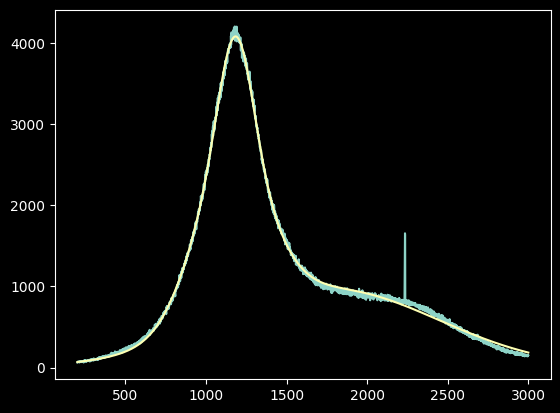

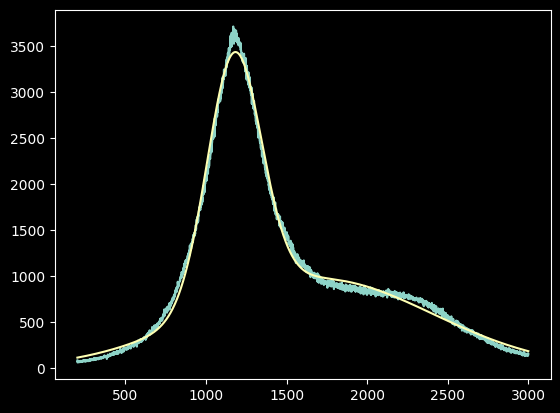

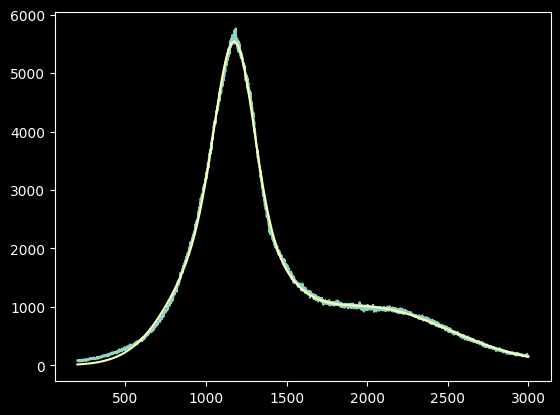

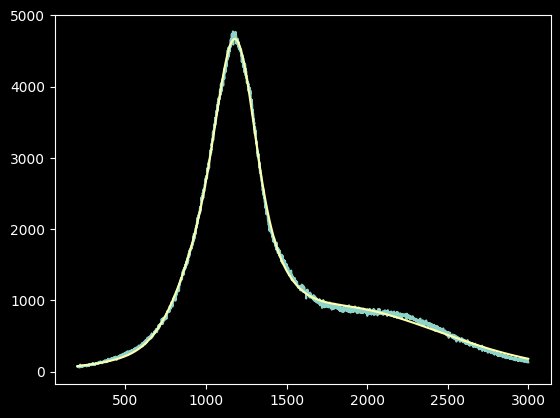

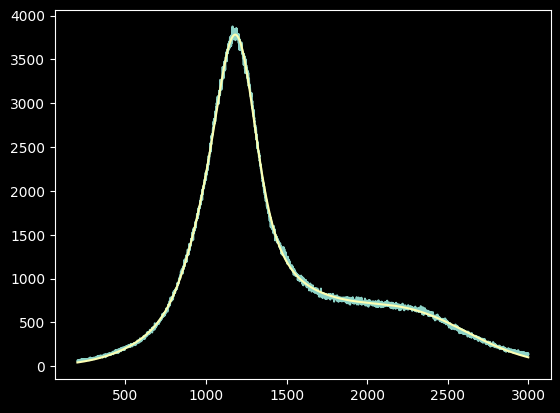

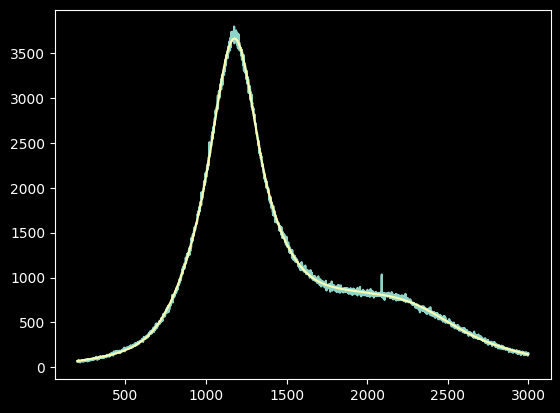

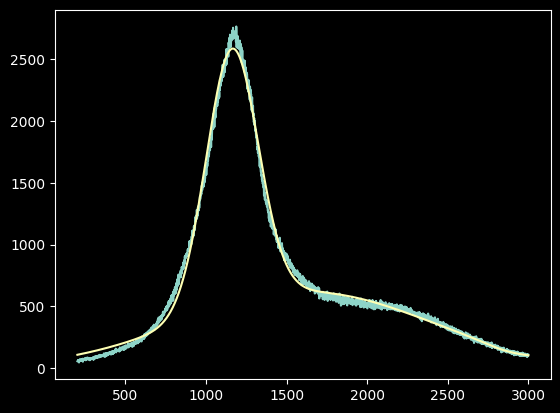

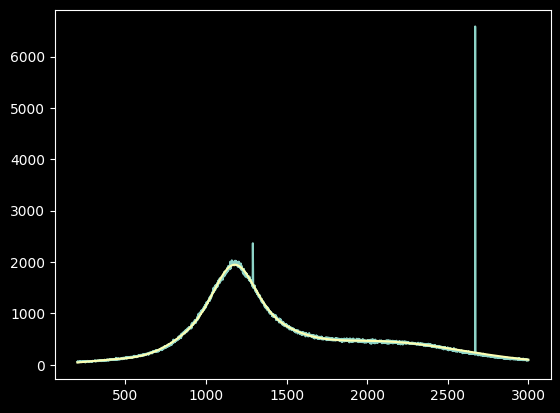

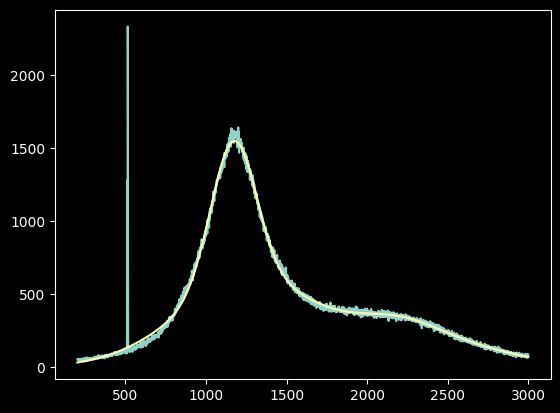

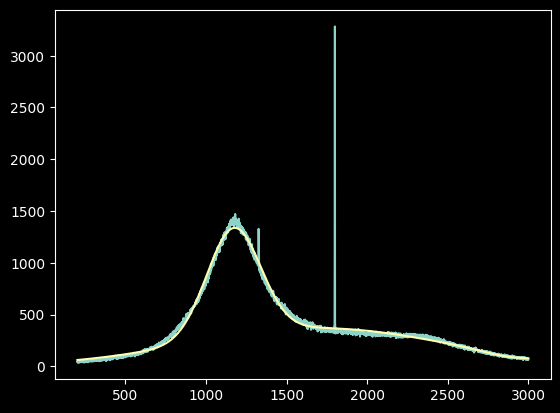

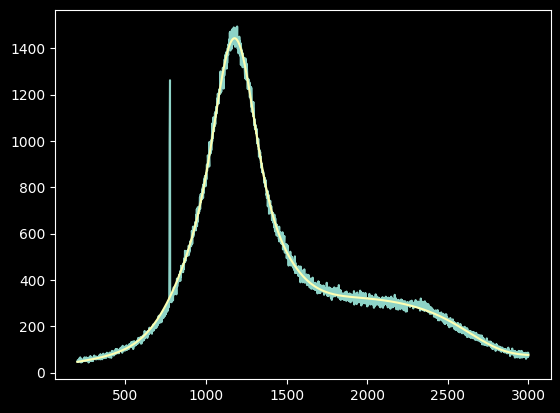

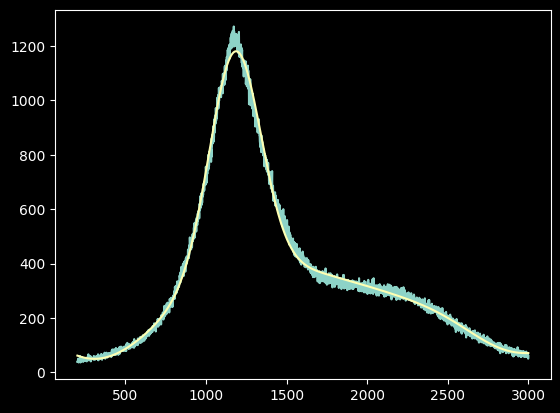

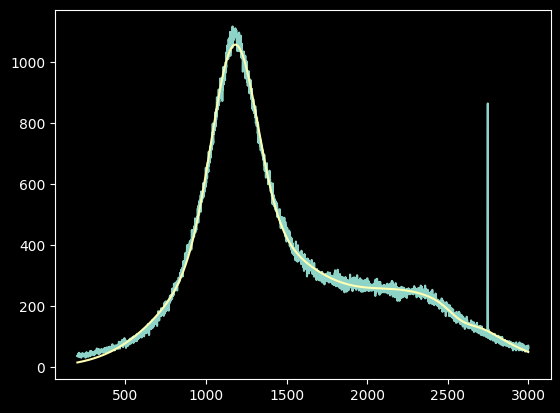

In [16]:
for k,v in ramanspecs.items():
        plt.plot(v.x, v.y)
        plt.plot(v.fitedparamsx, v.fitedparamsy)
        plt.show()


***
# Sustrayendo la informacion de alta frecuencia
***

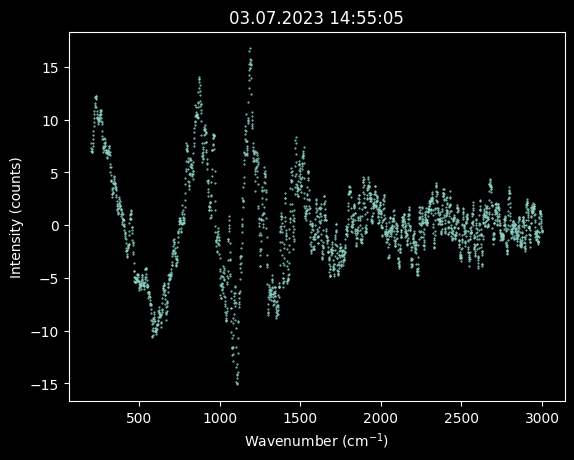

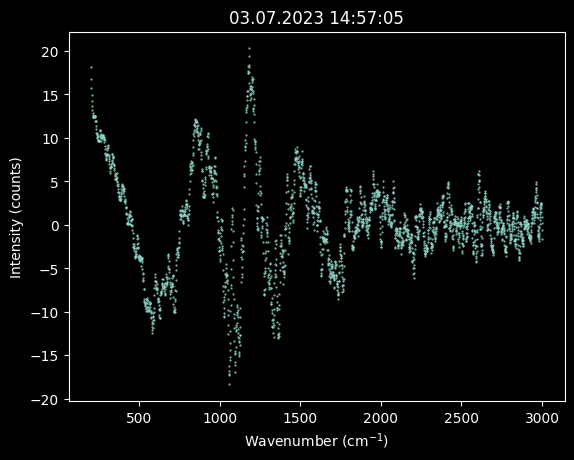

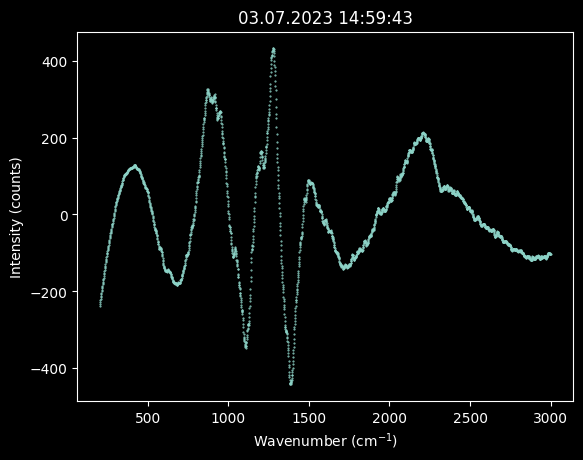

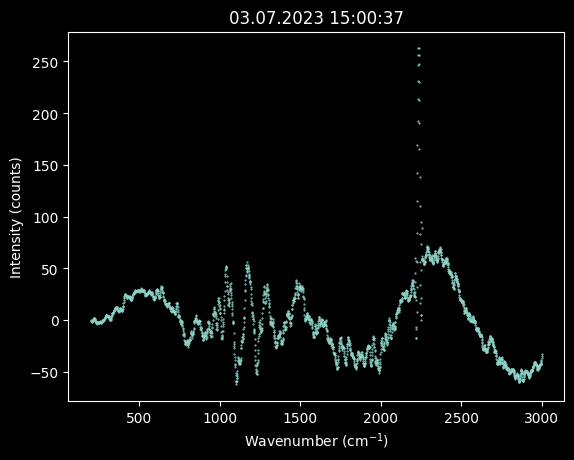

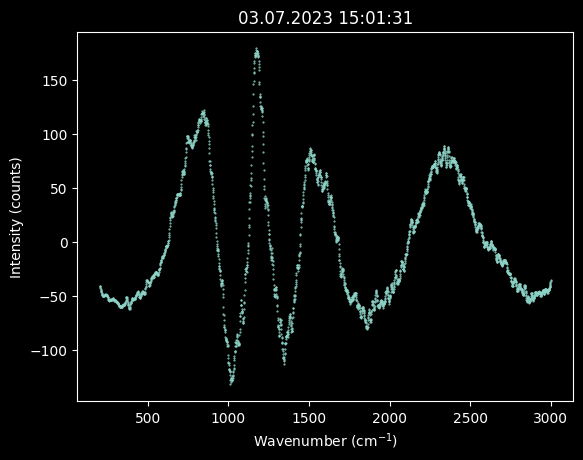

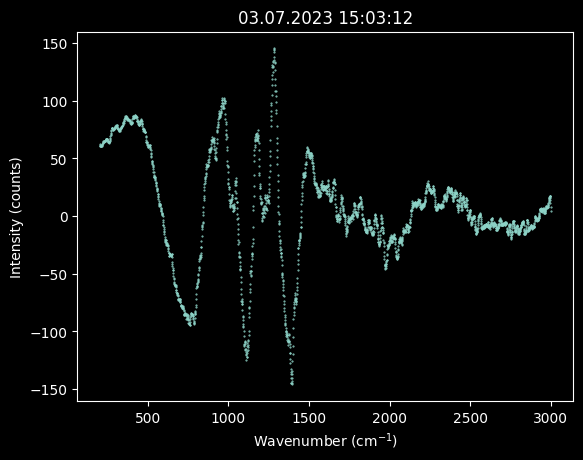

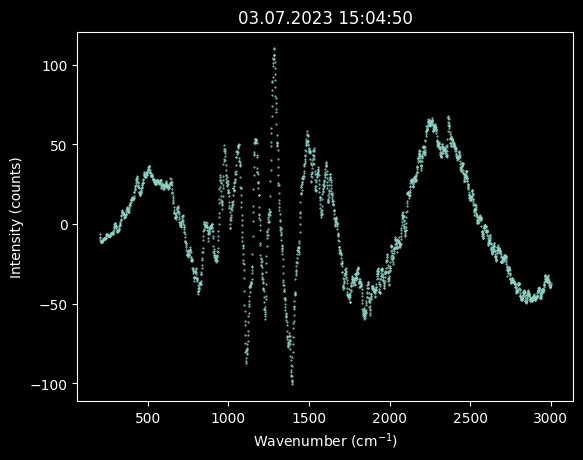

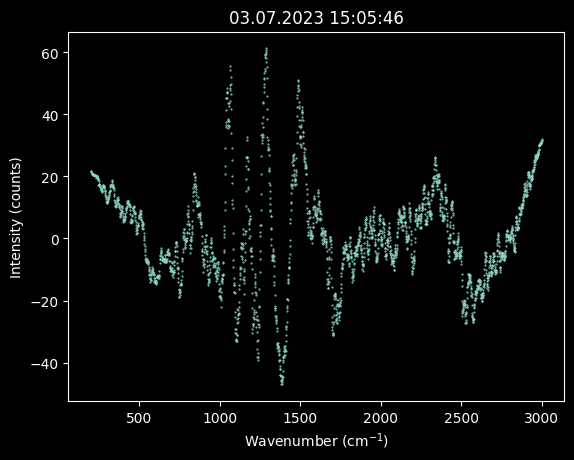

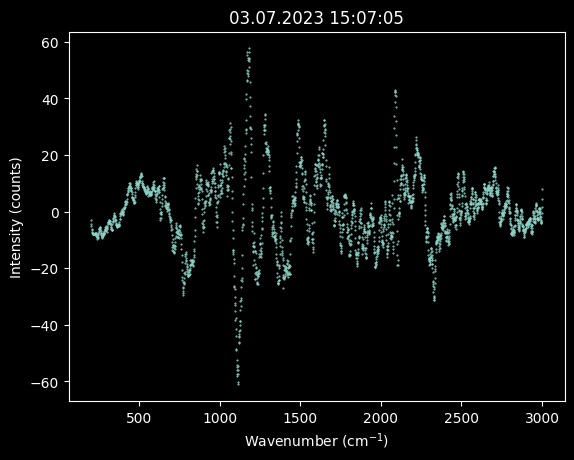

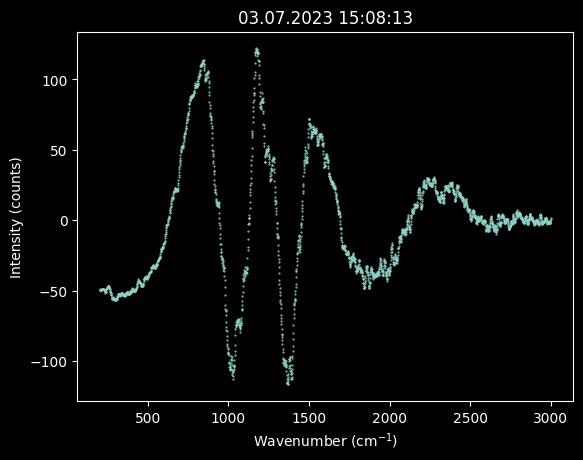

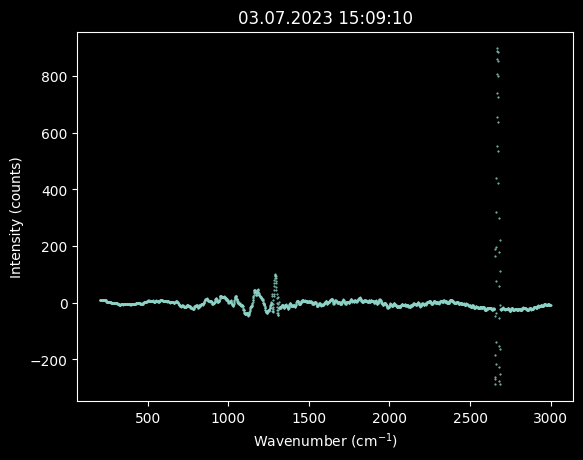

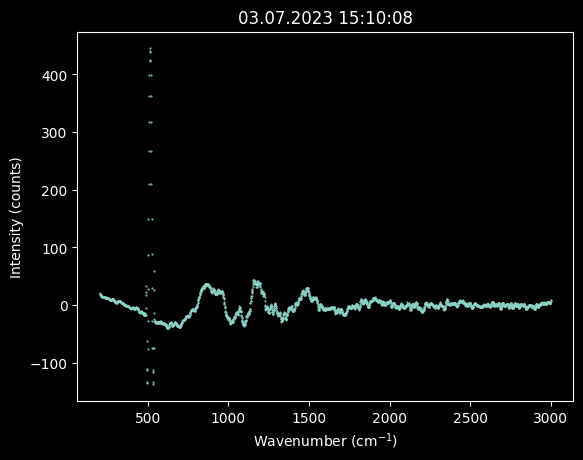

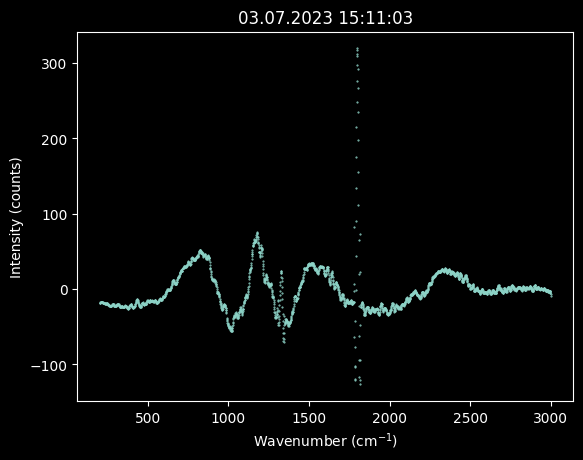

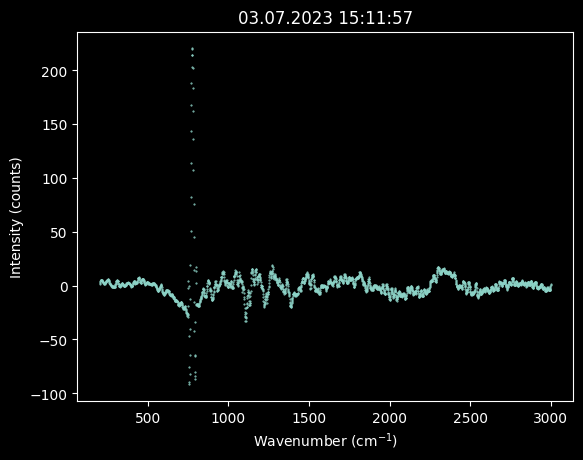

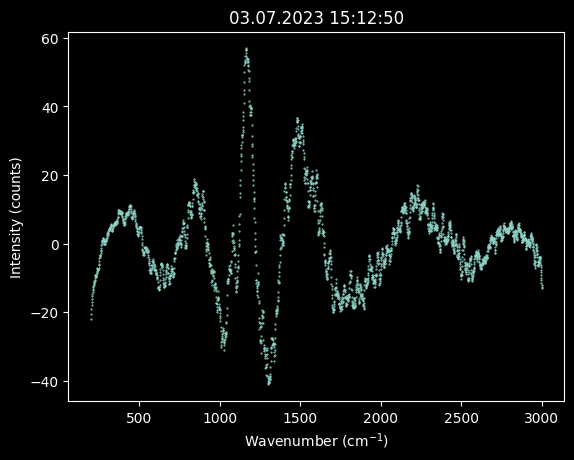

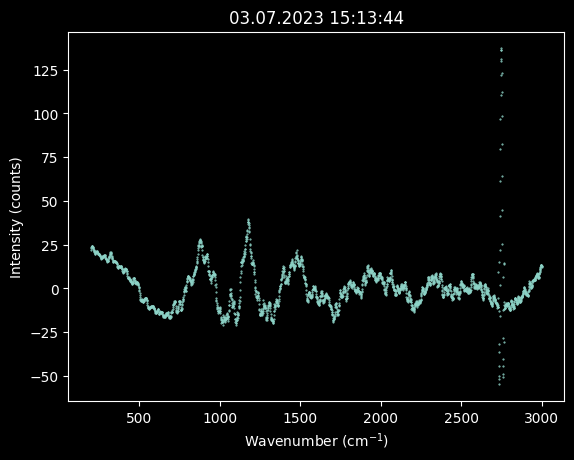

<Figure size 640x480 with 0 Axes>

In [17]:
for k,v in ramanspecs.items():
    v.sav_gol(v.gaussbasedx, v.gaussbasedy, window=40, order=4,from_args=True)

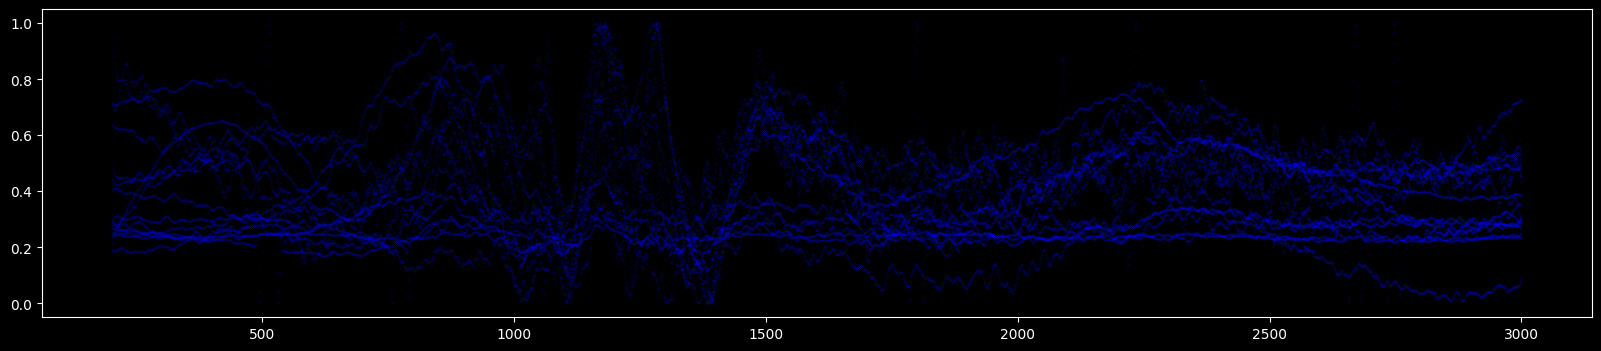

In [18]:
# Now we prepare a plot figure to plot all the spectra

fig, ax = plt.subplots(figsize=(20,4))

for k,v in ramanspecs.items():
    yy = v.denoisedy - v.denoisedy.min()
    yy = yy/yy.max()
    ax.plot(v.denoisedx, yy,'o',markersize=0.1,color='blue')
    # clearing the figure
    #plt.clf()


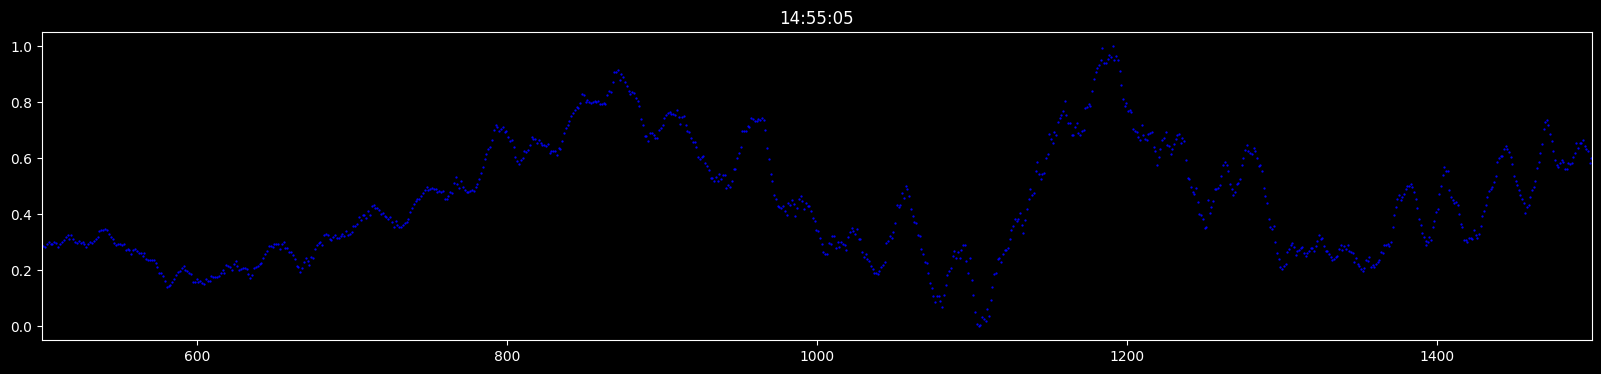

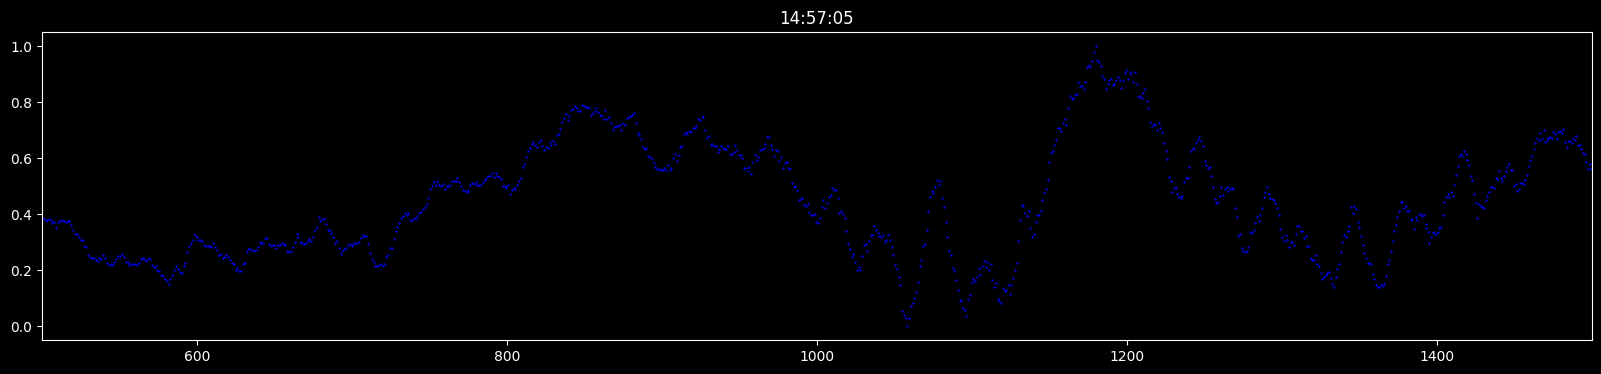

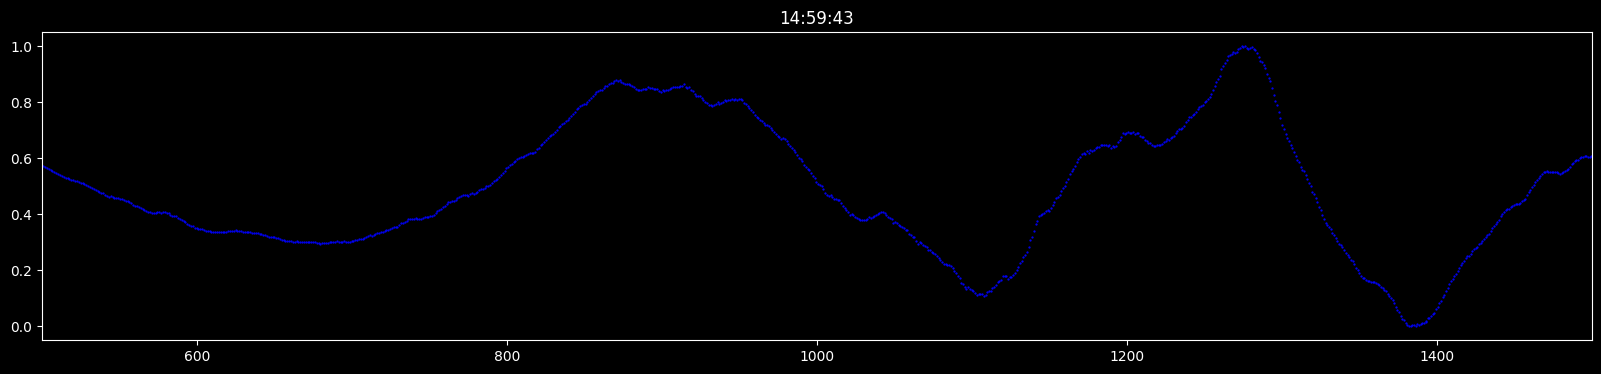

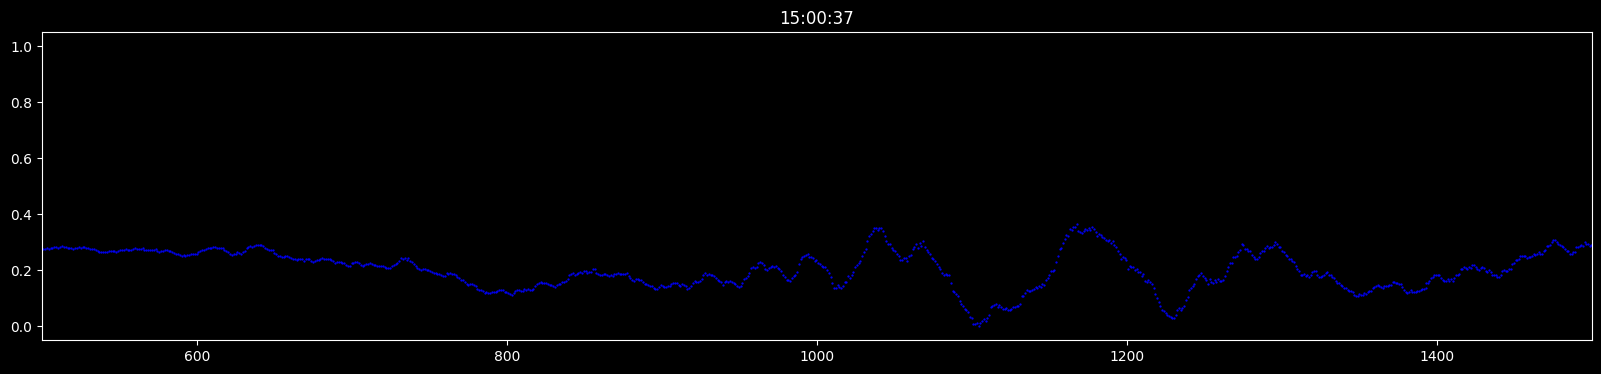

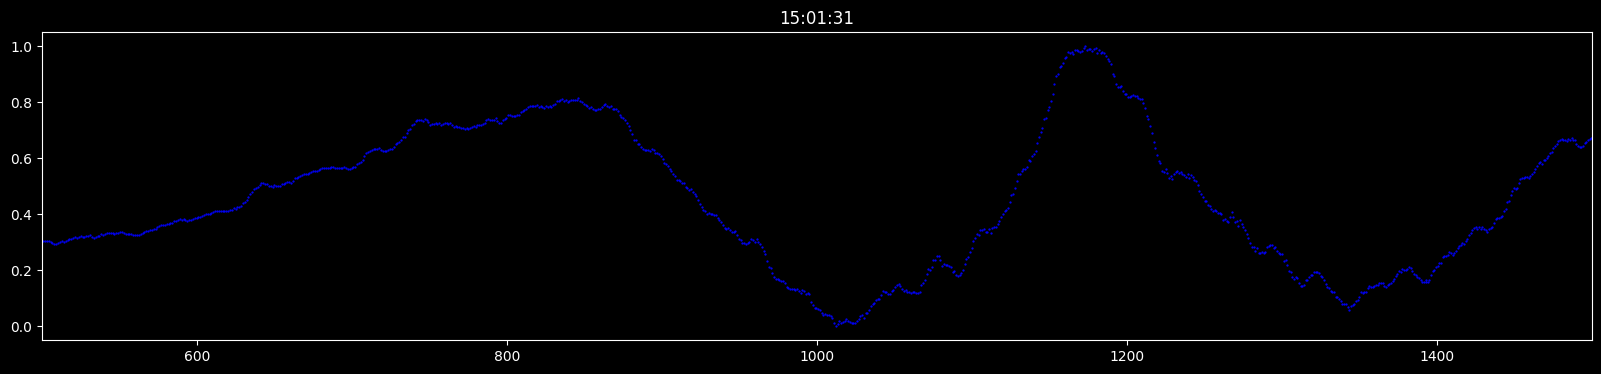

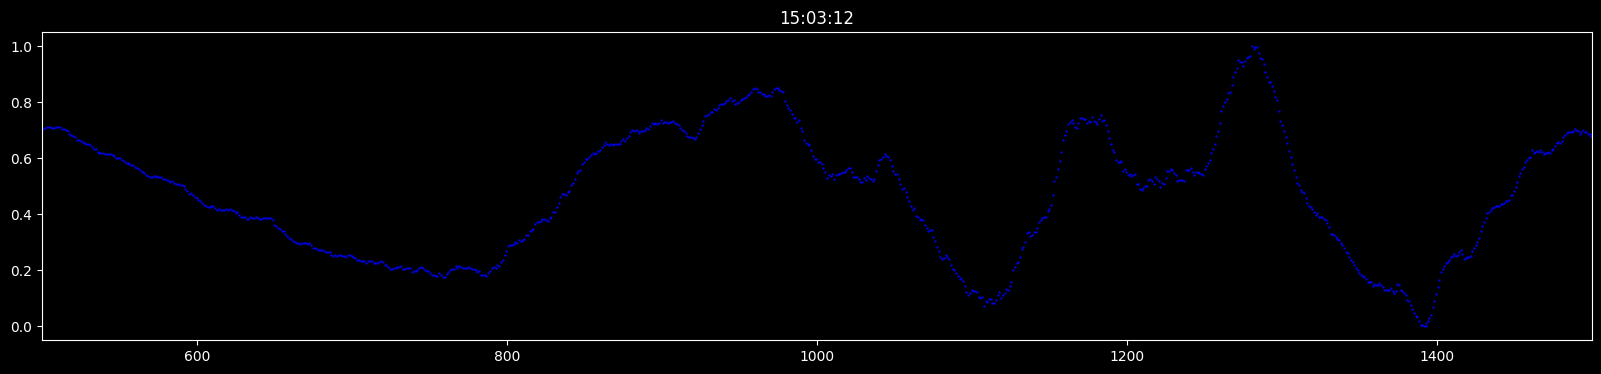

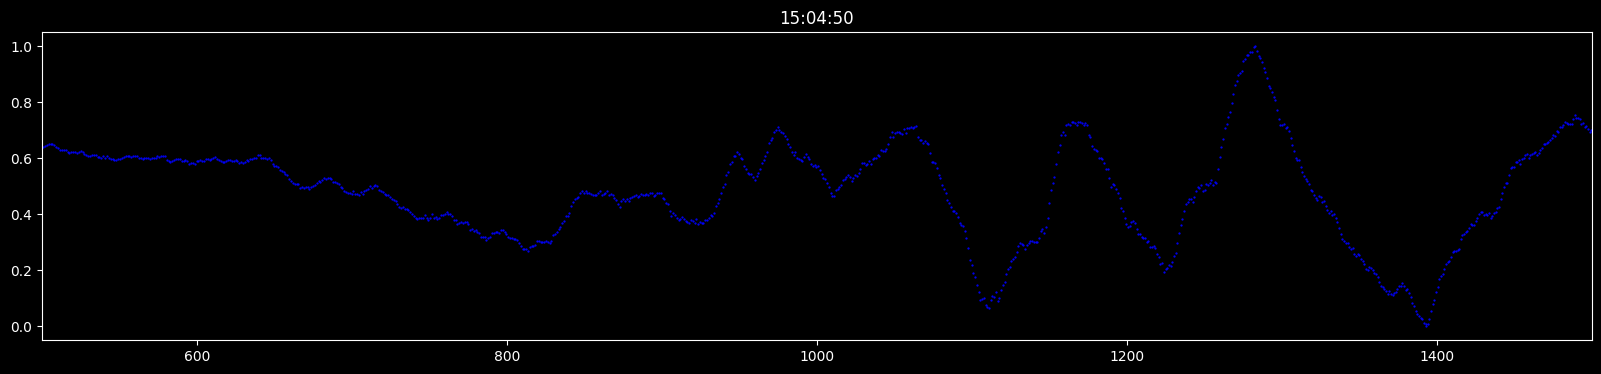

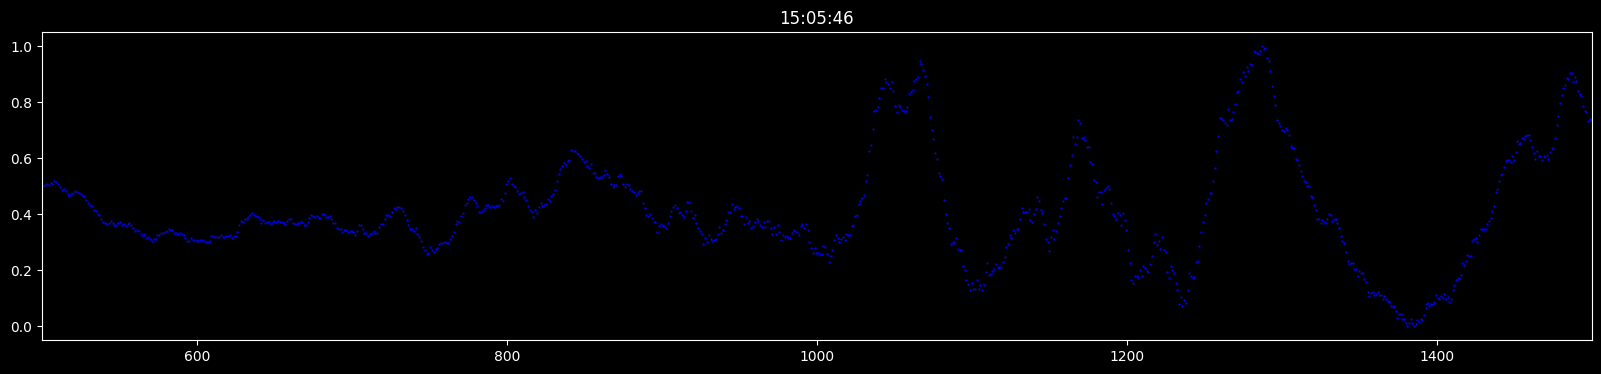

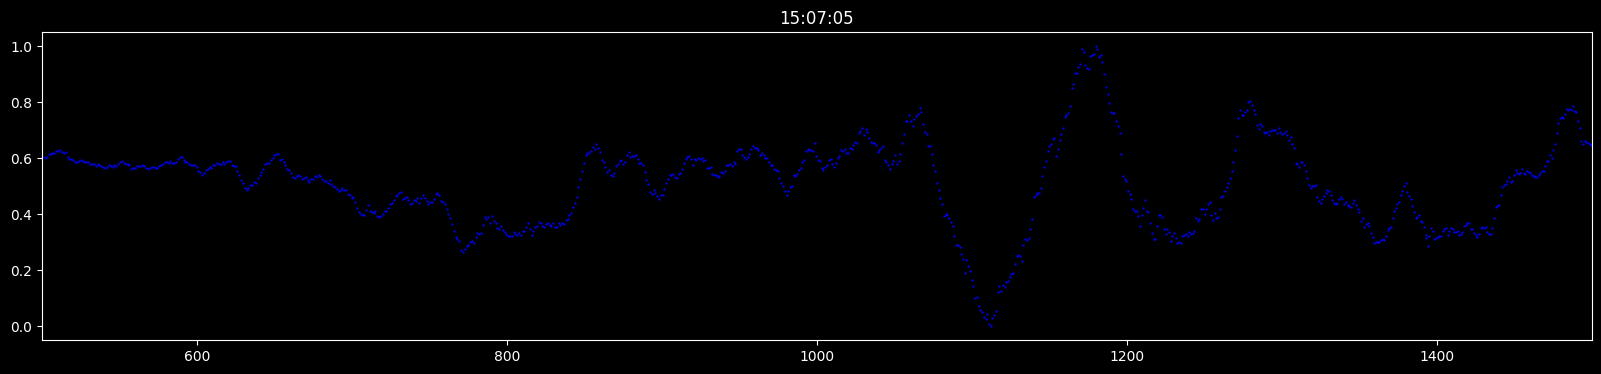

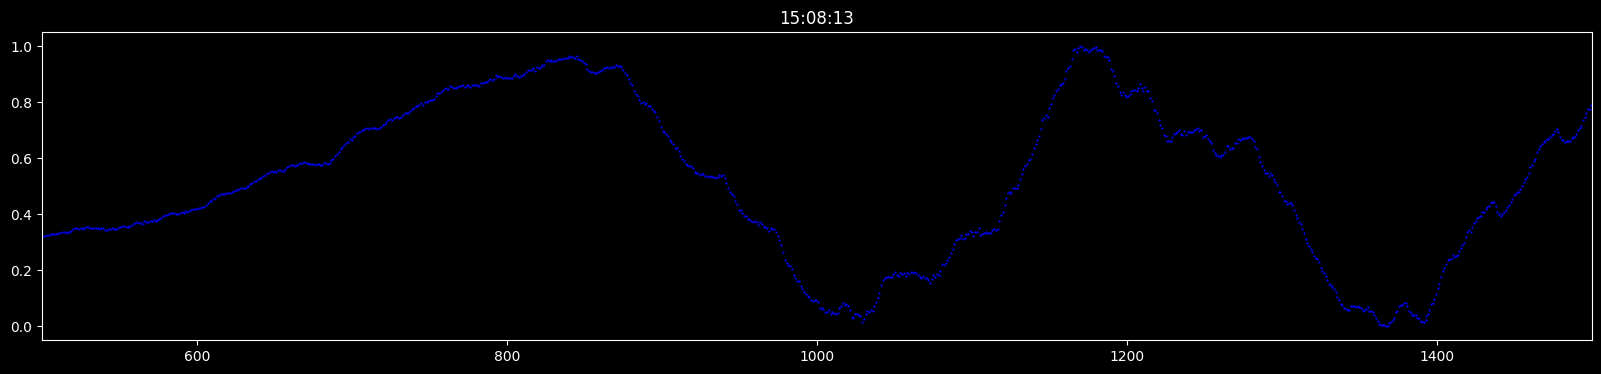

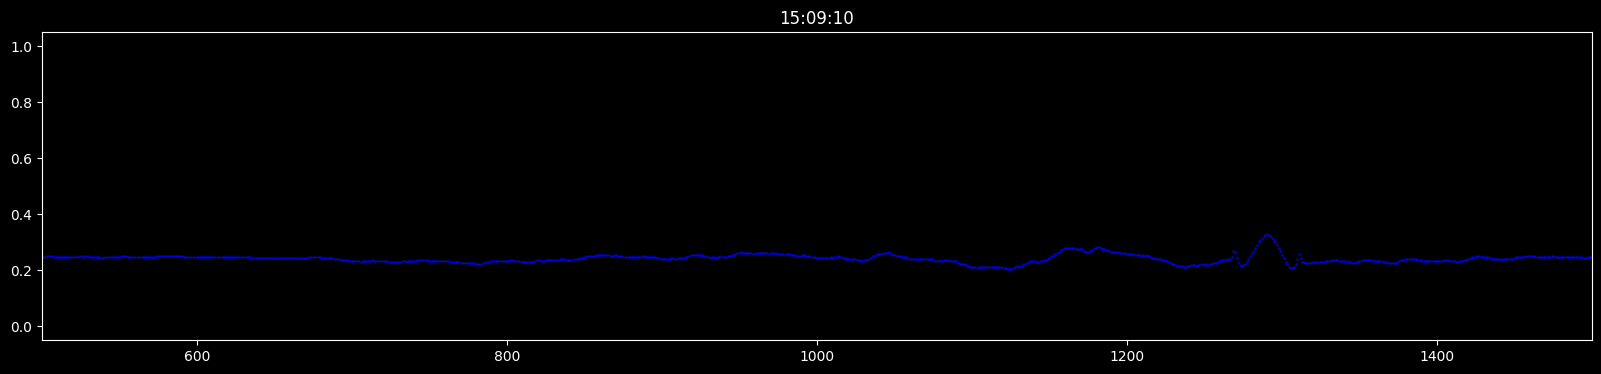

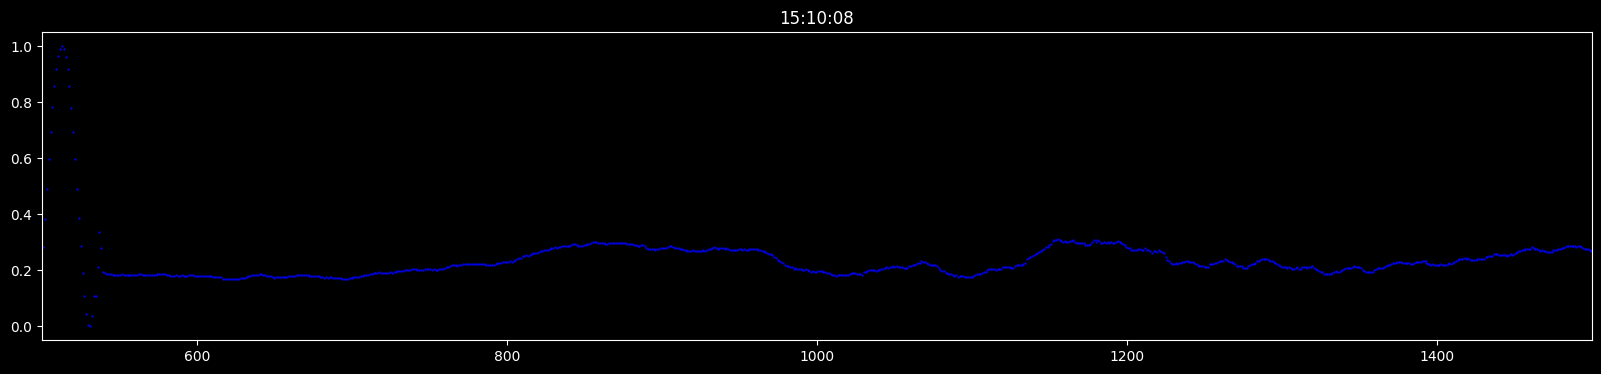

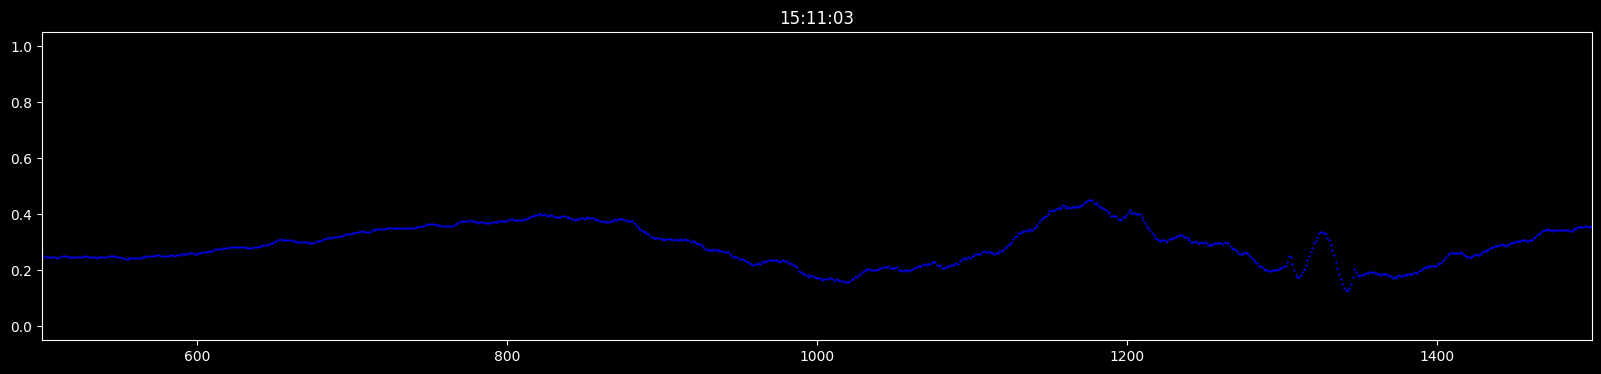

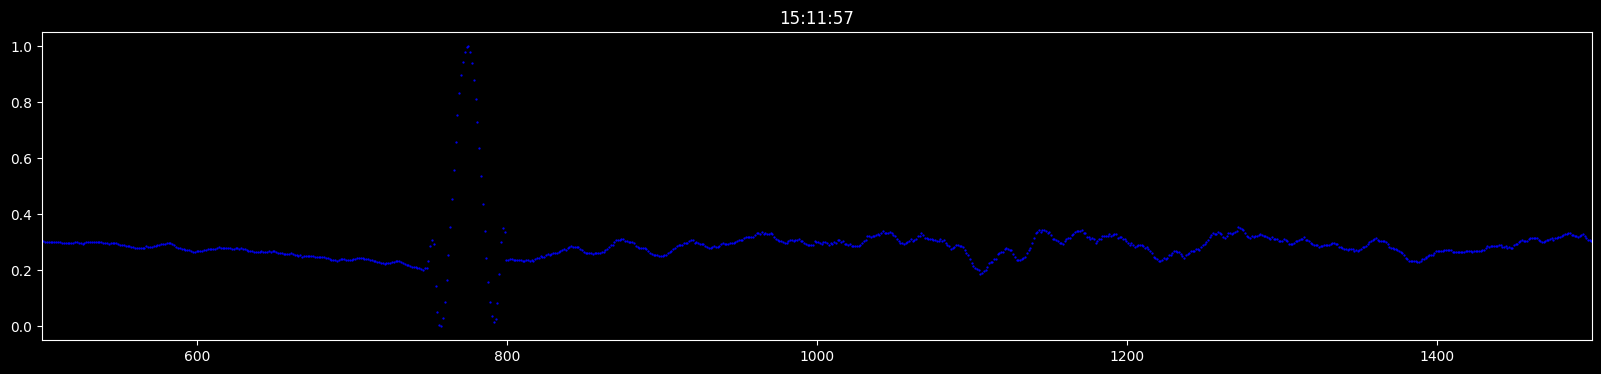

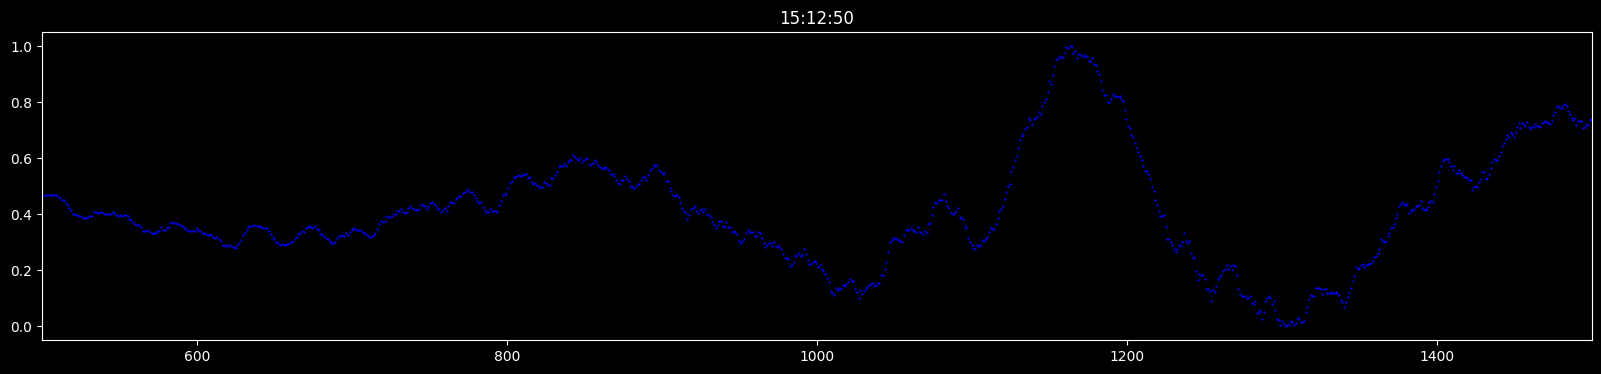

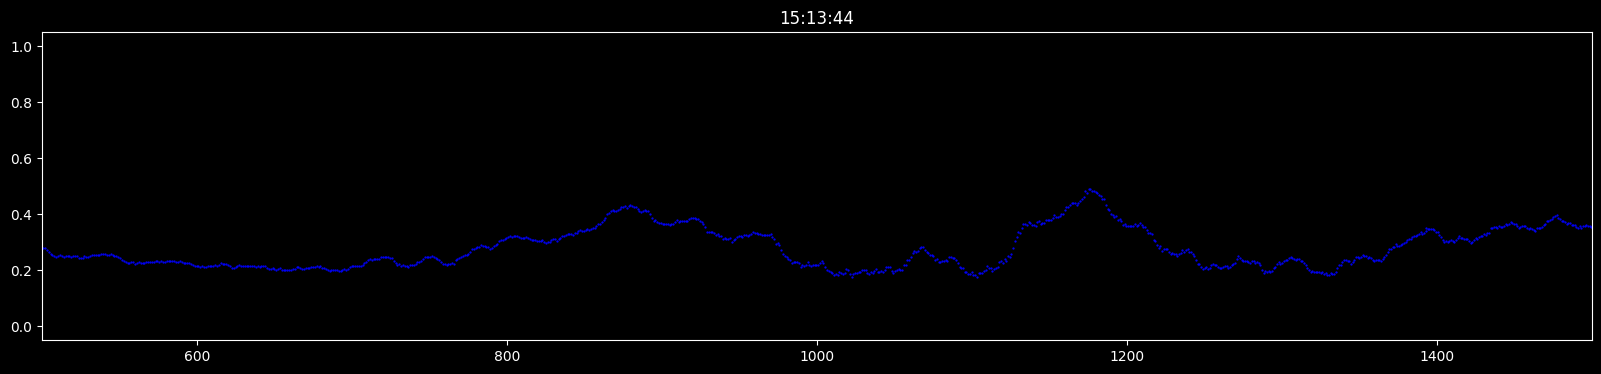

In [20]:
for k,v in ramanspecs.items():
    yy = v.denoisedy - v.denoisedy.min()
    yy = yy/yy.max()
    plt.figure(figsize=(20,4))
    # Plotting for x in the range of 500 to 1500
    plt.xlim(500,1500)
    plt.plot(v.denoisedx, yy, 'o', markersize=0.6, color='blue')
    # saving the figure
    plt.savefig('./createvid2/'+k+'.png', dpi=300)
    plt.title(k)
    plt.show()

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

def fit_raman(raman):
    # Generate some sample data
    x_ = raman.x
    y_ = raman.y

    # Fit the data to the Gaussian function
    popt, pcov = curve_fit(gaussian, x_, y_, p0=[100, 100, 100])

    # Retrieve the optimized parameters
    amplitude, mean, stddev = popt

    y_fit = gaussian(x_, amplitude, mean, stddev)
    y_new = y_ - y_fit

    # Plot the original data and the fitted curve
    plt.plot(x_, y_new - min(y_new) , 'r-', color='cyan',label='Data')
    # plt.plot(xf, y_fit,color='red', label='Fit')
    raman.setprops(x_, 'x_b')
    raman.setprops(y_new - min(y_new), 'y_b')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(raman.acquired)
    plt.show()
    return x_, y_new - min(y_new)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(x, y, threshold=3):
    # Calculate the mean and standard deviation
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_std, y_std = np.std(x), np.std(y)

    # Compute the Z-scores for each point
    x_z_scores = np.abs((x - x_mean) / x_std)
    y_z_scores = np.abs((y - y_mean) / y_std)

    # Find the indices of points with Z-scores greater than the threshold
    outlier_indices = np.where((x_z_scores > threshold) | (y_z_scores > threshold))[0]

    # Remove the outliers
    x_filtered = np.delete(x, outlier_indices)
    y_filtered = np.delete(y, outlier_indices)

    return x_filtered, y_filtered


# Detect and remove outliers

def plot_removed(r,t_):
    x_filtered, y_filtered = remove_outliers(r.props['x_b'], r.props['y_b'], threshold=t_)
    r.setprops(x_filtered, 'x_filtered')
    r.setprops(y_filtered, 'y_filtered')

    # Plotting before and after removing outliers
    plt.figure(figsize=(10, 4))

    xinitial = r.props['x_b']
    yinitial = r.props['y_b']

    plt.subplot(1, 2, 1)
    plt.plot(xinitial, yinitial)
    plt.title('Before Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(1, 2, 2)
    plt.plot(x_filtered, y_filtered)
    plt.title('After Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

In [15]:
from scipy.signal import savgol_filter

def plot_savinormalized(raman_object): 
    u = raman_object.props['x_filtered']
    v = raman_object.props['y_filtered']
    vhat = savgol_filter(v, 51, 3) # window size 51, polynomial order 3
    # Ploting the data with h and w as width and height respectively
    h = 5
    w = 20

    ########################################

    # Find the maximum y-value
    max_y = np.max(vhat)

    # Normalize the y-values
    normalized_y = np.divide(vhat, max_y)

    ########################################

    plt.figure(figsize=(w, h))
    plt.title(raman_object.acquired)
    plt.plot(u, normalized_y, color='red')
    raman_object.setprops(u, 'x_proposed')
    raman_object.setprops(normalized_y, 'y_proposed')
    plt.savefig('./vid50/{}.png'.format(raman_object.acquired))


In [21]:
import cv2
import os

def create_video(image_folder, output_video_path, time_interval, num_repeats):
    # Get the list of image filenames in the folder
    image_files = sorted(os.listdir(image_folder))
    image_files = [f for f in image_files if f.endswith('.png')]

    # Load the first image to get its dimensions
    first_image_path = os.path.join(image_folder, image_files[0])
    first_image = cv2.imread(first_image_path)
    height, width, _ = first_image.shape

    # Create a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Choose the desired video codec
    video_writer = cv2.VideoWriter(output_video_path, fourcc, 1 / time_interval, (width, height))

    # Repeat the sequence of images
    for _ in range(num_repeats):
        for image_file in image_files:
            image_path = os.path.join(image_folder, image_file)
            image = cv2.imread(image_path)

            # Write the image to the video writer
            video_writer.write(image)

            # Pause for the specified time interval
            cv2.waitKey(int(time_interval * 1000))

    # Release the video writer and destroy any OpenCV windows
    video_writer.release()
    cv2.destroyAllWindows()

# Specify the input image folder, output video path, time interval, and number of repeats
image_folder = './createvid2'
output_video_path = 'dedo.mp4'
time_interval = 0.1  # In seconds (e.g., 1.0 = 1 second)
num_repeats = 5

# Create the video
create_video(image_folder, output_video_path, time_interval, num_repeats)
